[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)

[타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning](https://kaggle-kr.tistory.com/17?category=868316)  
[타이타닉 캐글 링크](https://www.kaggle.com/c/titanic)  
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.

1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
  
2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
  
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
  
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
  
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [1]:
import numpy as np # numpy: arrray(다차원 벡터 자료구조) 및 각종 계산 라이브러리
import pandas as pd # pandas: Series(1차원) 및 DataFrame(2차원) 자료구조 및 각종 데이터 분석 라이브러리
import matplotlib as mpl        # matplotlib: 그래프 등 시각화 라이브러리
import matplotlib.pyplot as plt # matplotlib.pyplot: matplotlib 중 실제 그래프 그리는 데 사용하는 패키지
import seaborn as sns           # seaborn: 시각화 라이브러리 matplotlib에 연계.
# %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## plt.style.use('seaborn')
## sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno 

## ignore warnings
import warnings
warnings.filterwarnings('ignore')


# import numpy as np, pandas as pd, matplotlib as mpl, seaborn as sns, warnings, missingno as msno
# import matplotlib.pyplot as plt

# get_ipython().run_line_magic('matplotlib', 'inline')
# mpl.rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False
# warnings.filterwarnings('ignore')

## 1. Dataset 확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas 입니다.
- 우리는 pandas 를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
- 캐글에서 데이터셋은 보통 train, testset 으로 나뉘어 있습니다.

In [2]:
df_train = pd.read_csv('./input/titanic/train.csv')
df_test = pd.read_csv('./input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## pandas dataframe 에는 describe() 메소드가 있는 데, 
## 이를 쓰면 각 feature 가 가진 통계치들을 반환해줍니다.
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.1 Null data check

In [5]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

print('='*55)

for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

# for col in df_train.columns:
#     msg = f'column: {col:>10}\t Percent of NaN value: {100*(df_train[col].isnull().sum()/df_train[col].shape[0]):.2f}%'
#     print(msg)

# print ('='*55)

# for col in df_test.columns:
#     msg = f'column: {col:>10}\t Percent of NaN value: {100*(df_test[col].isnull().sum()/df_test[col].shape[0]):.2f}%'
#     print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%
column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN 

In [6]:
# 나는 보통 info()로 확인
print(df_train.info(), df_test.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
# msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2));

# 그래프는 출력되지만 아래와 같은 오류 발생.
# ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

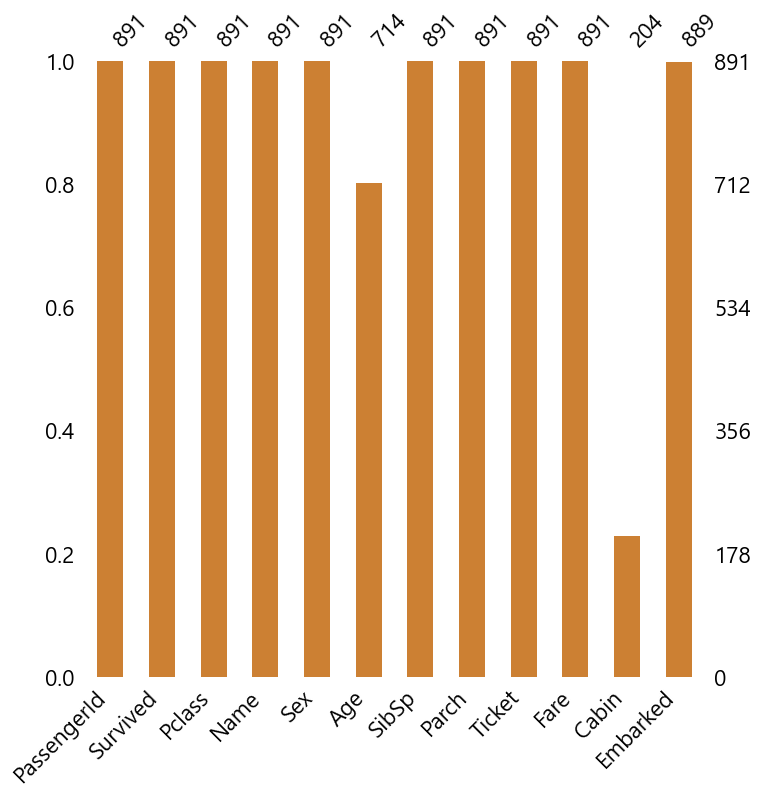

In [8]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2));

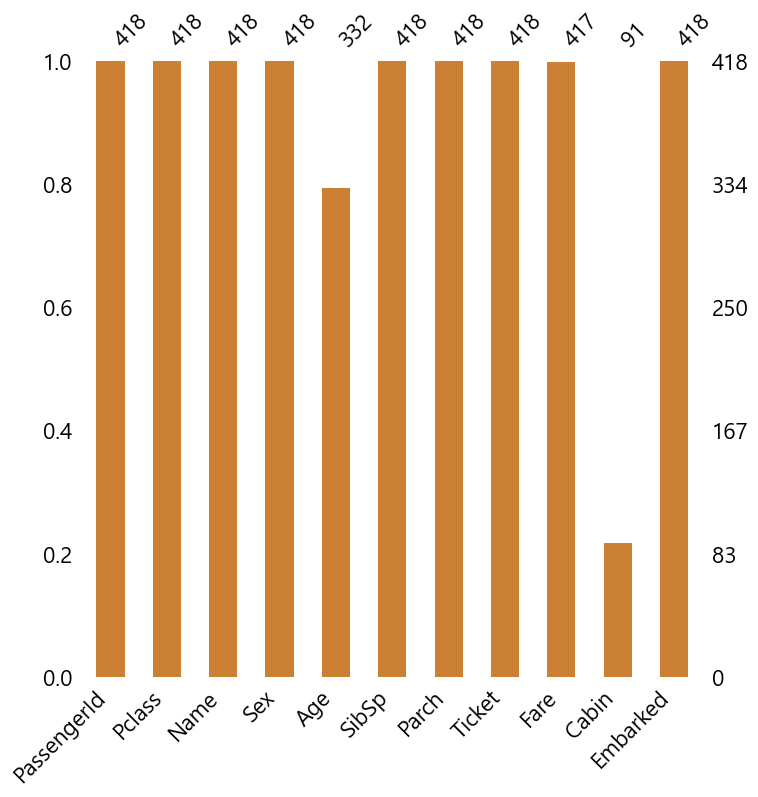

In [9]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2));

### 1.2 Target label 확인

- target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.

- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

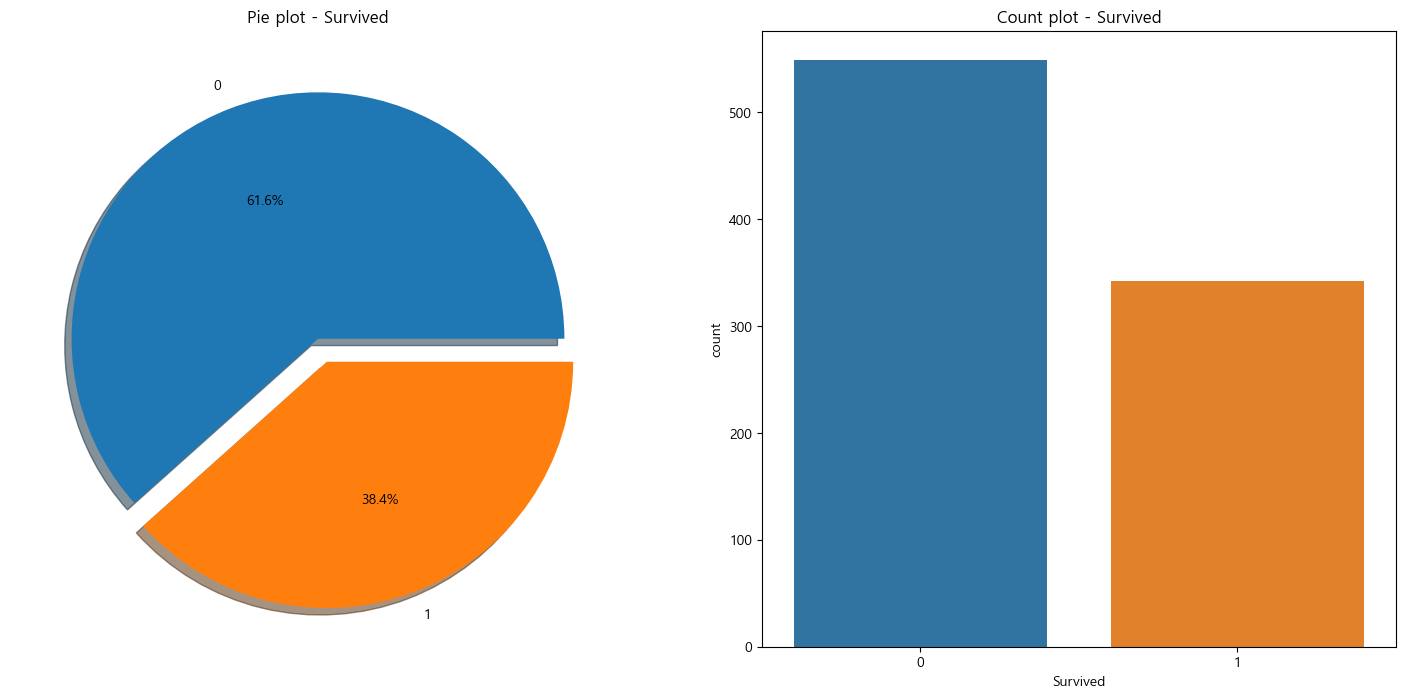

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8)) # 한 그림에 여러 그래프: 1행 2열, 전체 크기 (18, 8)

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)    # df에서 바로 plot 그리기
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(data=df_train, x='Survived', ax=ax[1])    # seaborn으로 plot 그리기
ax[1].set_title('Count plot - Survived')
plt.show()

## 2. Exploratory data analysis

- 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.  
  
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

### 2.1 Pclass

- 먼저 Pclass 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.  
    
- 먼저 Pclass 에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby 를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다.  
  
- 'Pclass', 'Survived' 를 가져온 후, pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다  
  
- 아래와 같이 count() 를 하면, 각 class 에 몇명이 있는 지 확인할 수 있으며, sum() 을 하면, 216 명중 생존한(survived=1)사람의 총합을 주게 됩니다

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).agg(['count', 'sum', 'mean'])
# as_index: 집계 기준 column을 index 사용 여부. default=True
df_train[['Pclass', 'Survived']].groupby('Pclass').agg(['count','sum','mean'])

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

In [14]:
df_train[['Pclass', 'Survived']].pivot_table(index='Pclass', values='Survived', aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
df_train[['Pclass', 'Survived']].pivot_table(index='Pclass', values='Survived', aggfunc='sum')

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# margins: 소계 및 합계

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


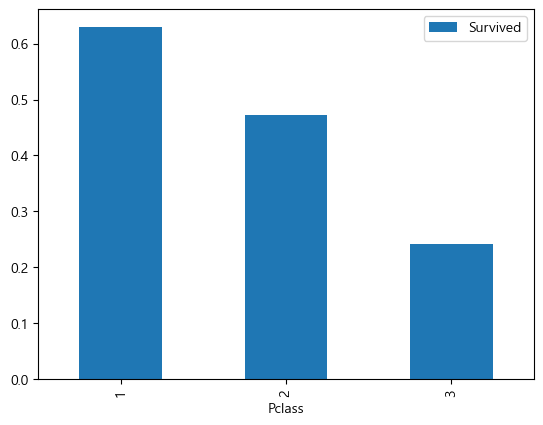

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar();
# df_train[['Pclass', 'Survived']].pivot_table(index='Pclass', values='Survived', aggfunc='mean').sort_values(by='Survived', ascending=False).plot.bar();

### 2.2 Sex
이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다.  
마찬가지로 pandas groupby 와 seaborn countplot 을 사용해서 시각화해봅시다.  

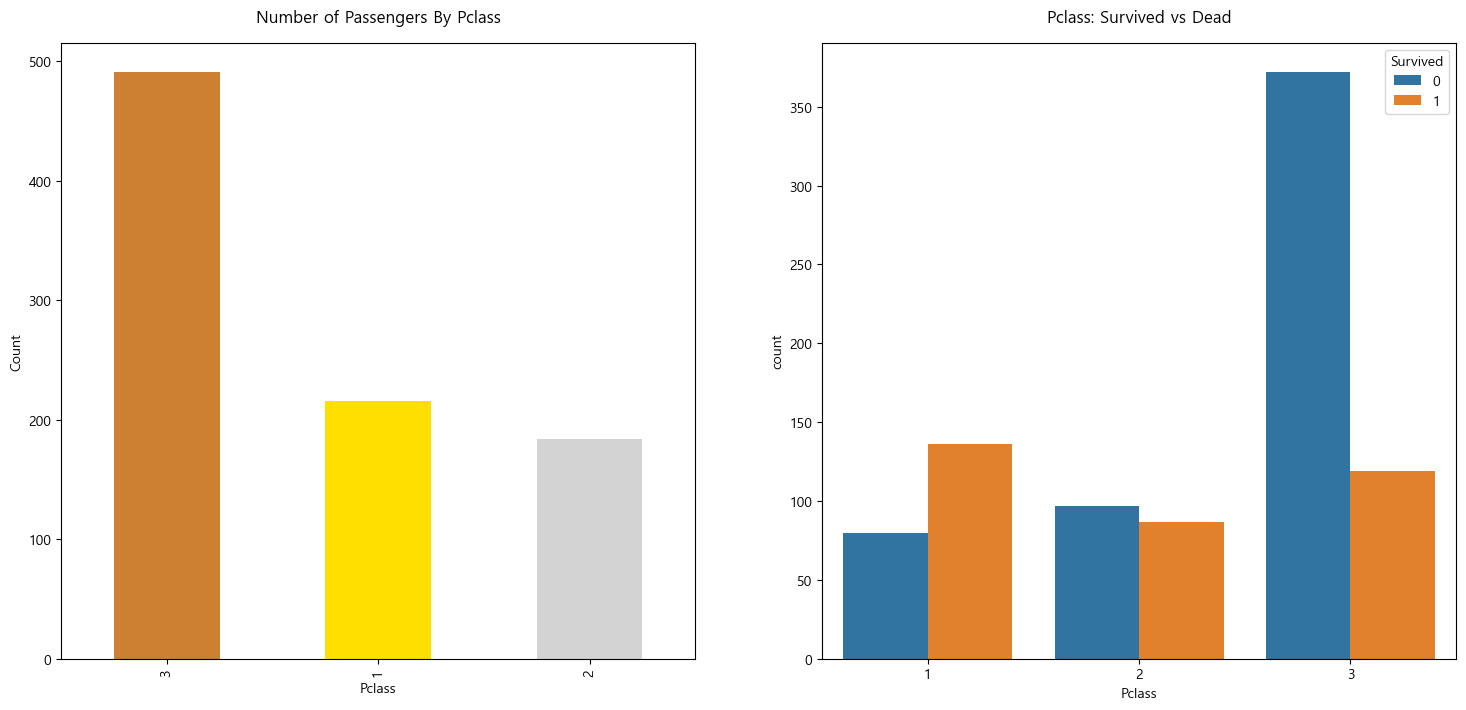

In [19]:
y_position = 1.02
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0]) # value_counts를 이용하여 bar로 countplot 생성
ax[0].set_title('Number of Passengers By Pclass', y=y_position) # y: 제목과 그래프의 거리
ax[0].set_ylabel('Count')
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

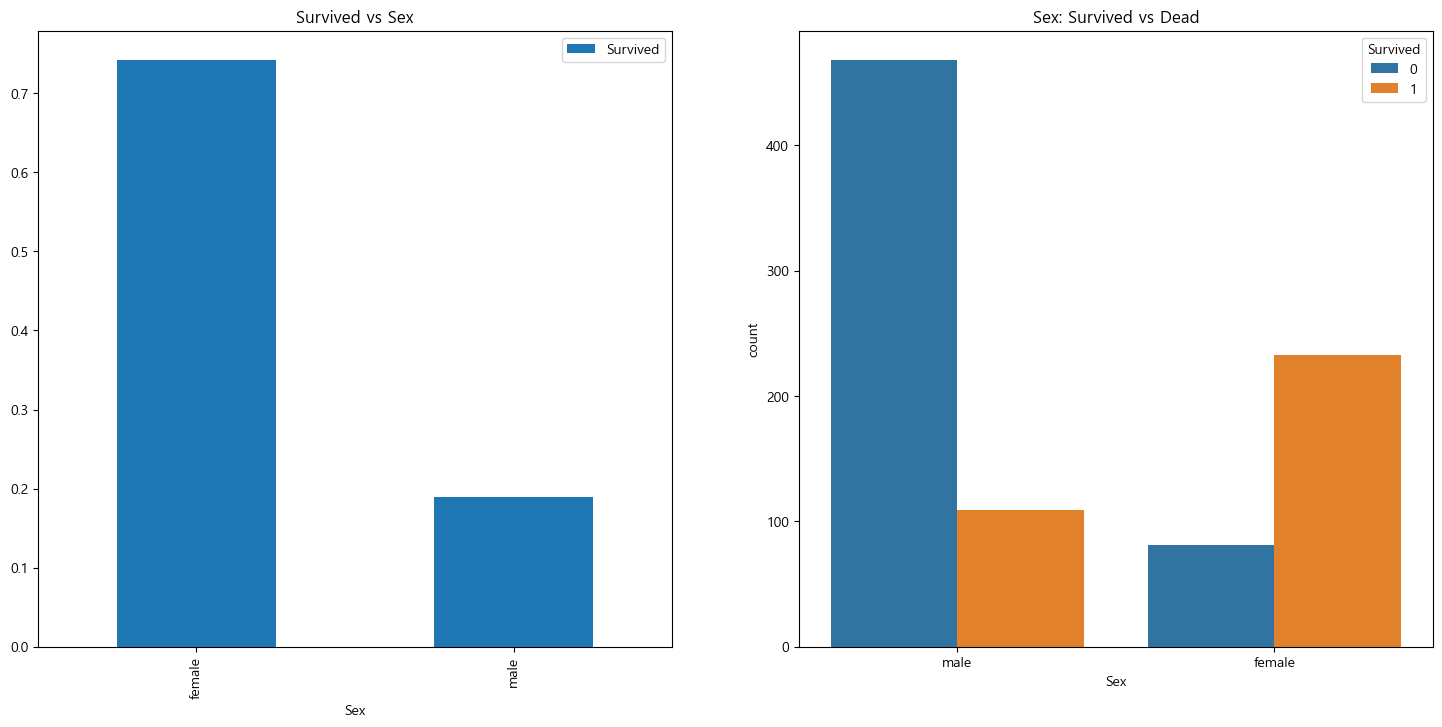

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# fig, ax = plt.subplots(1, 2, figsize=(18,8))
# df_train[['Sex', 'Survived']].pivot_table(index='Sex', values='Survived', aggfunc='mean').plot.bar(ax=ax[0])
# ax[0].set_title('Survived vs Sex')
# sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
# ax[1].set_title('Sex: Survived vs Dead')
# plt.show();

In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.3 Both Sex and Pclass
- 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 봅시다  
  
- seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.  

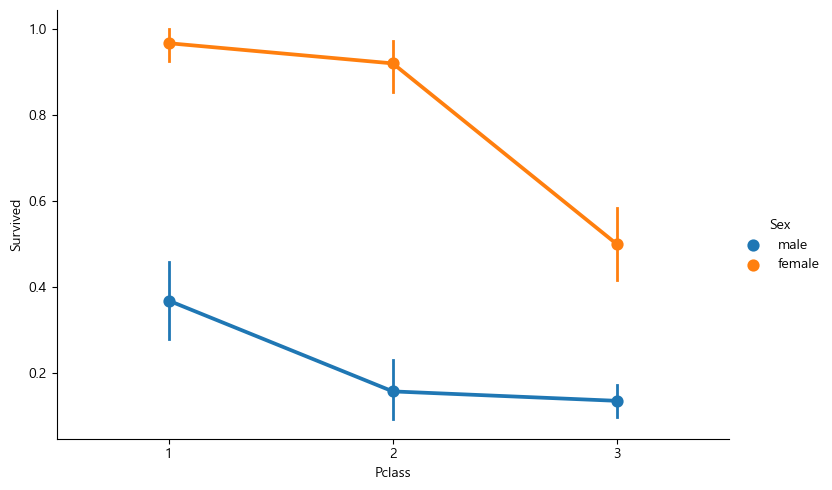

In [22]:
sns.catplot(data=df_train, x='Pclass', y='Survived', hue='Sex', kind='point',
               aspect=1.5, errwidth=2, scale=1);
            # kind의 인자: 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar', 'count'

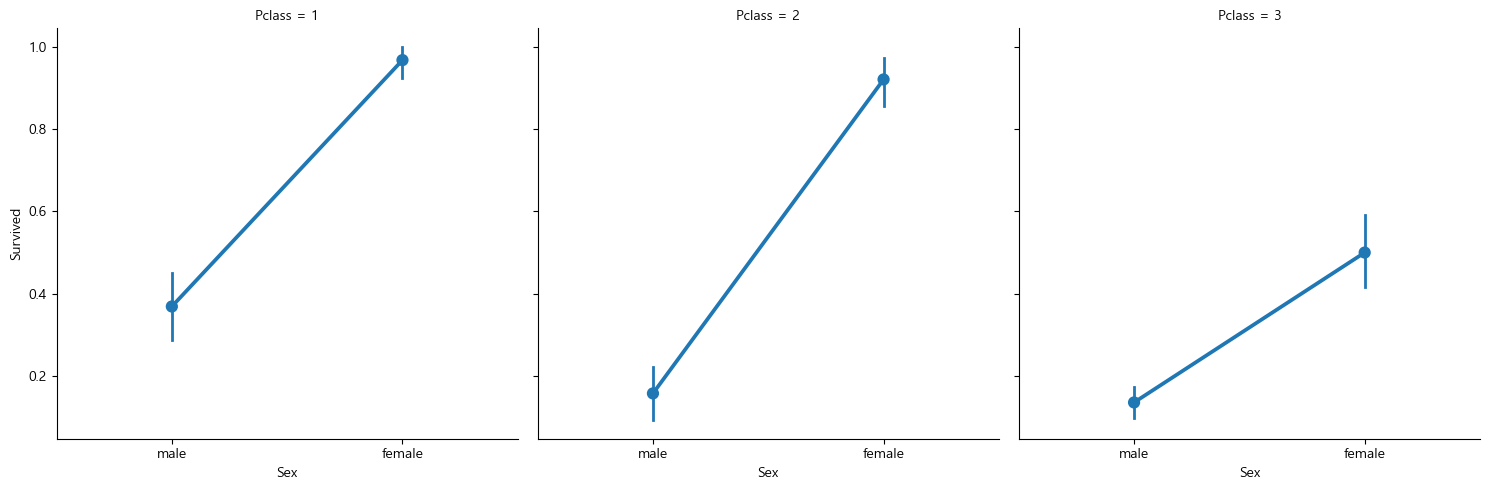

In [23]:
sns.catplot(data=df_train, x='Sex', y='Survived',col='Pclass', kind='point',
               aspect=1, errwidth=2, scale=1);

### 2.4 Age

이번에는 Age feature 를 살펴봅시다.

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

# print(f'제일 나이 많은 탑승객: {df_train.Age.max():.1f} Years')
# print(f'제일 어린 탑승객: {df_train.Age.min():.1f} Years')
# print(f'탑승객 평균 나이: {df_train.Age.mean():.1f} Years')

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [25]:
[i*0.001 for i in range(0,31,5)]

[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03]

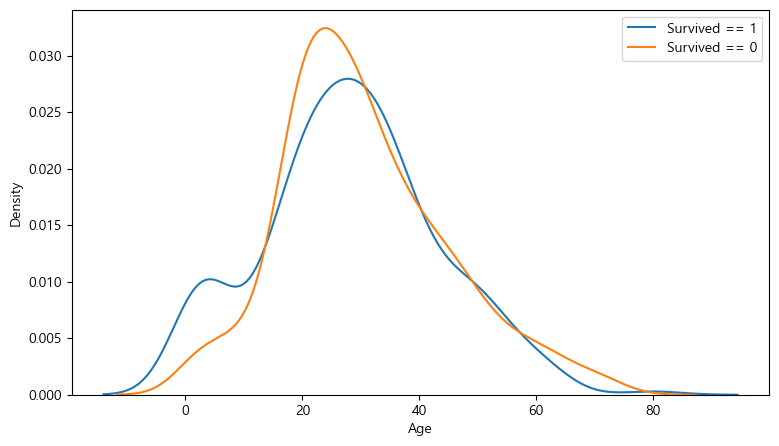

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)  # 동일한 ax에 그래프 그리기
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

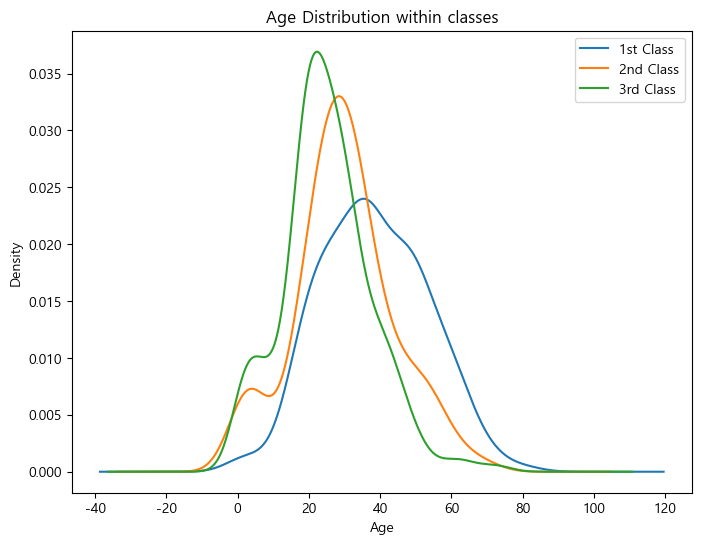

In [27]:
## Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show();

Class 가 높을 수록 나이 많은 사람의 비중이 커짐  
나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.  
나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.  

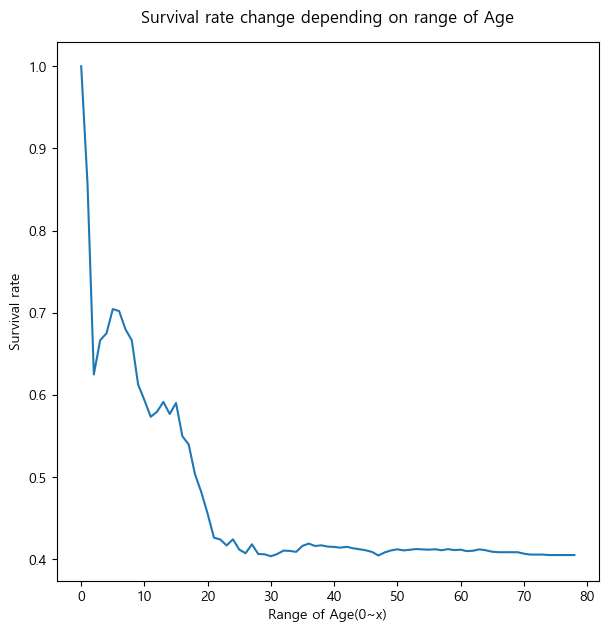

In [28]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 보시다시피, 나이가 어릴 수록 생존률이 확실히 높은것을 확인할 수 있습니다.  
 
- 우리는 이 나이가 중요한 feature 로 쓰일 수 있음을 확인했습니다.

### 2.5 Pclass, Sex, Age
  
- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot 입니다.  
  
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

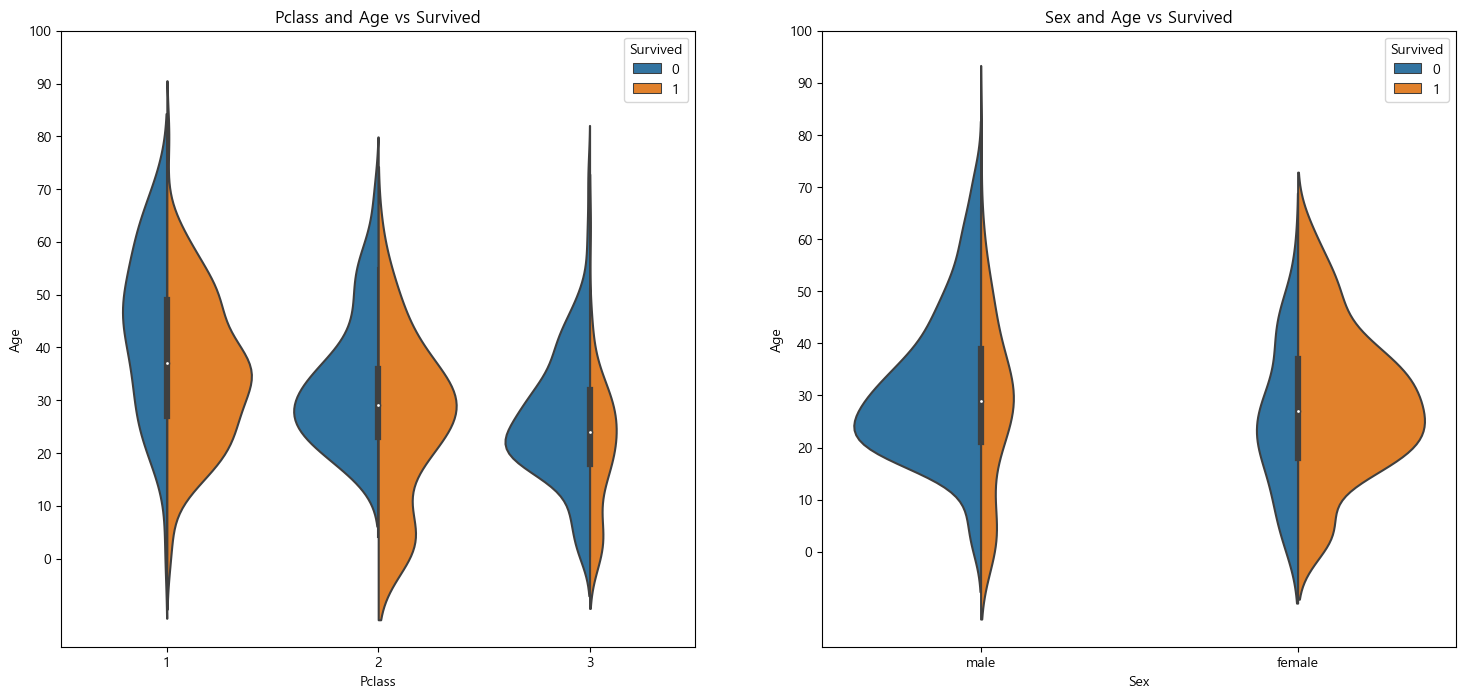

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='count', split=True, ax=ax[0])
# split: hue가 주어질 경우 True=그래프를 직선 기준으로 좌우로 그림, False=그래프를 별개로 그림
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 2.6 Embarked

- Embarked 는 탑승한 항구를 나타냅니다.  
  
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따르 생존률을 보겠습니다.

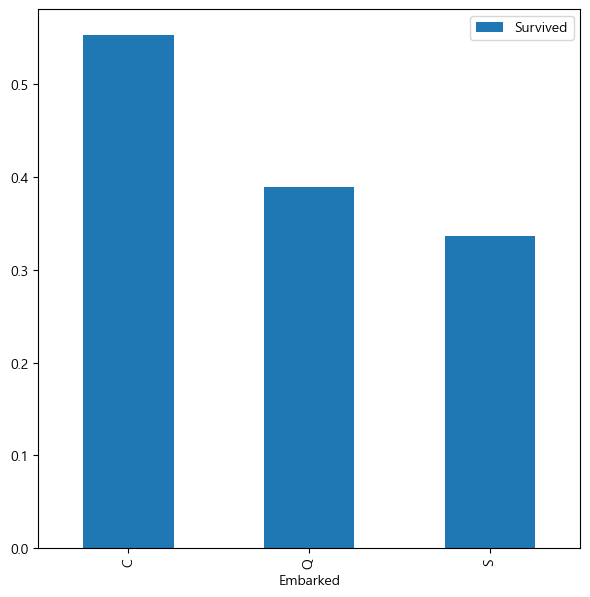

In [30]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax);

# df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(figsize=(7,7));
# df_train[['Embarked', 'Survived']].pivot_table(index='Embarked', values='Survived', aggfunc='mean').sort_values(by='Survived', ascending=False).plot.bar(figsize=(7,7));

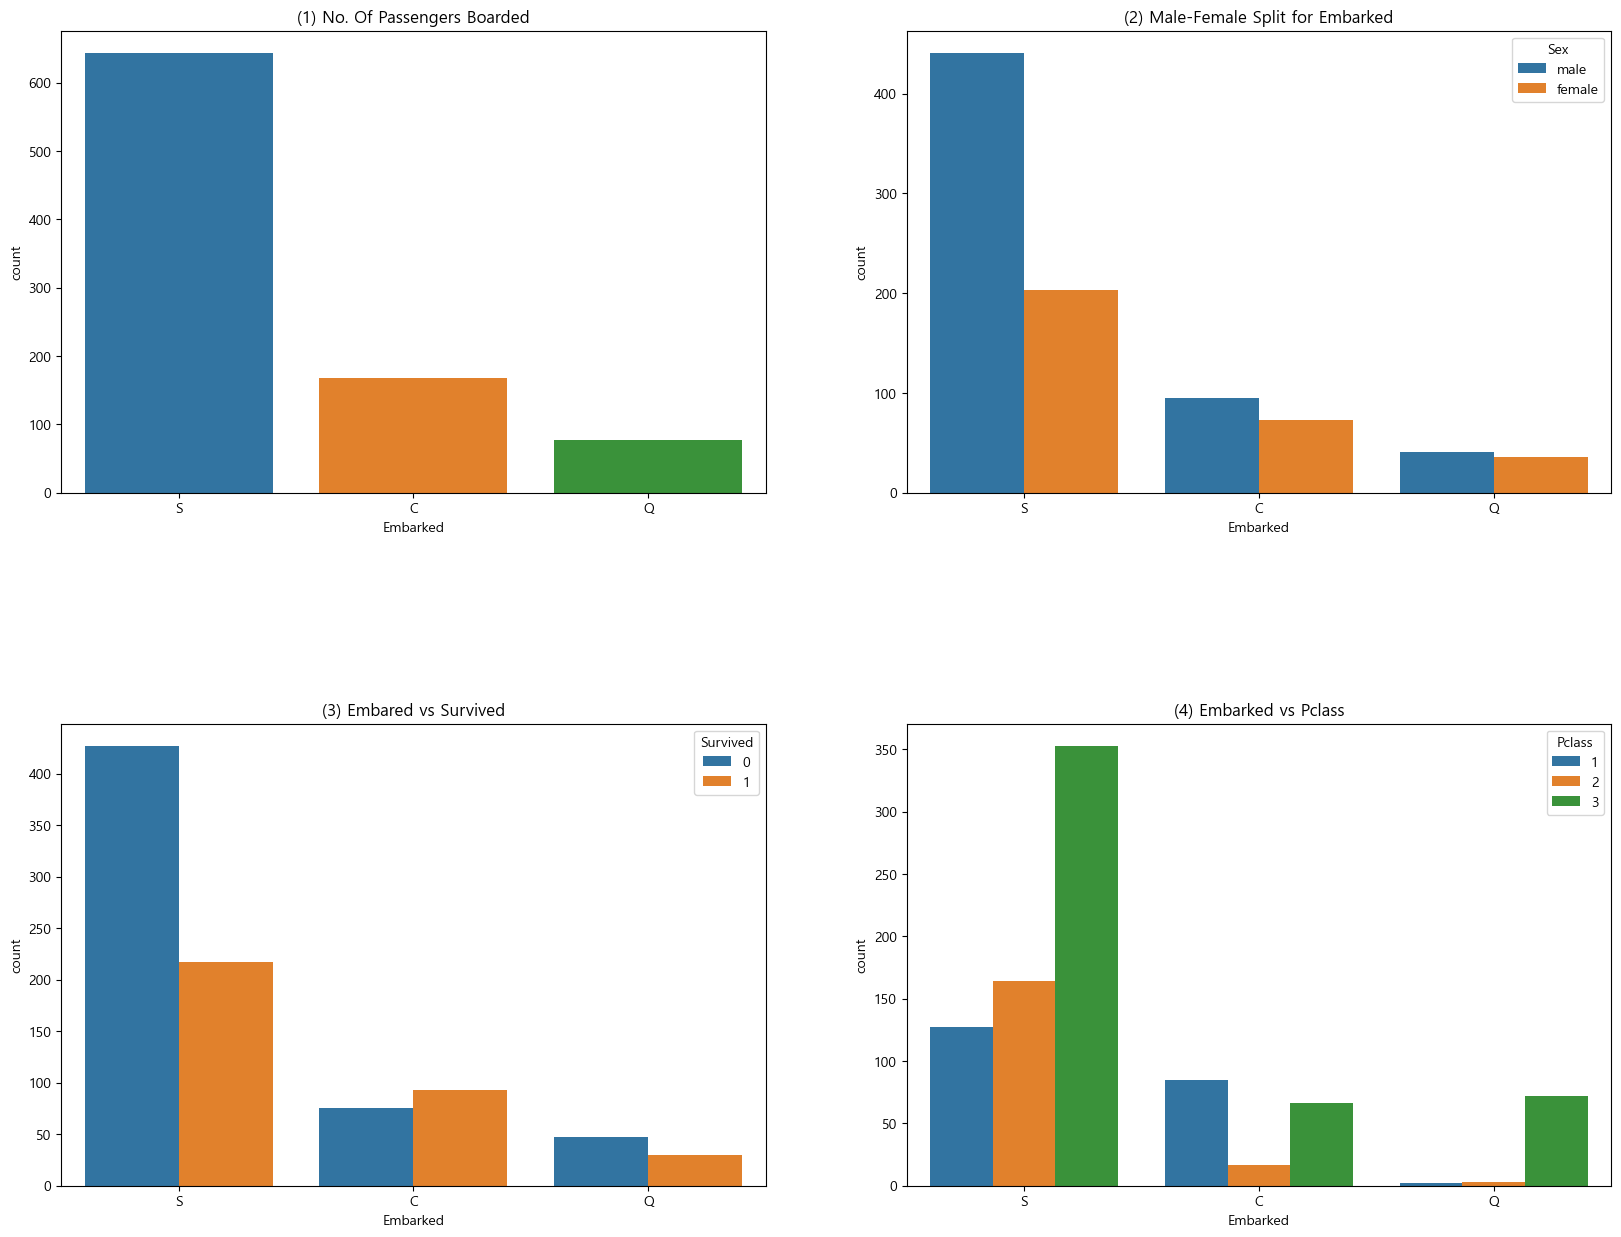

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(data=df_train, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('(3) Embared vs Survived')

sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅시다

In [32]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 ## 자신을 포함해야 하니 1을 더합니다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 ## 자신을 포함해야 하니 1을 더합니다.
print('Maximun size of Family:', df_train.FamilySize.max())
print('Minimun size of Family:', df_train.FamilySize.min())

Maximun size of Family: 11
Minimun size of Family: 1


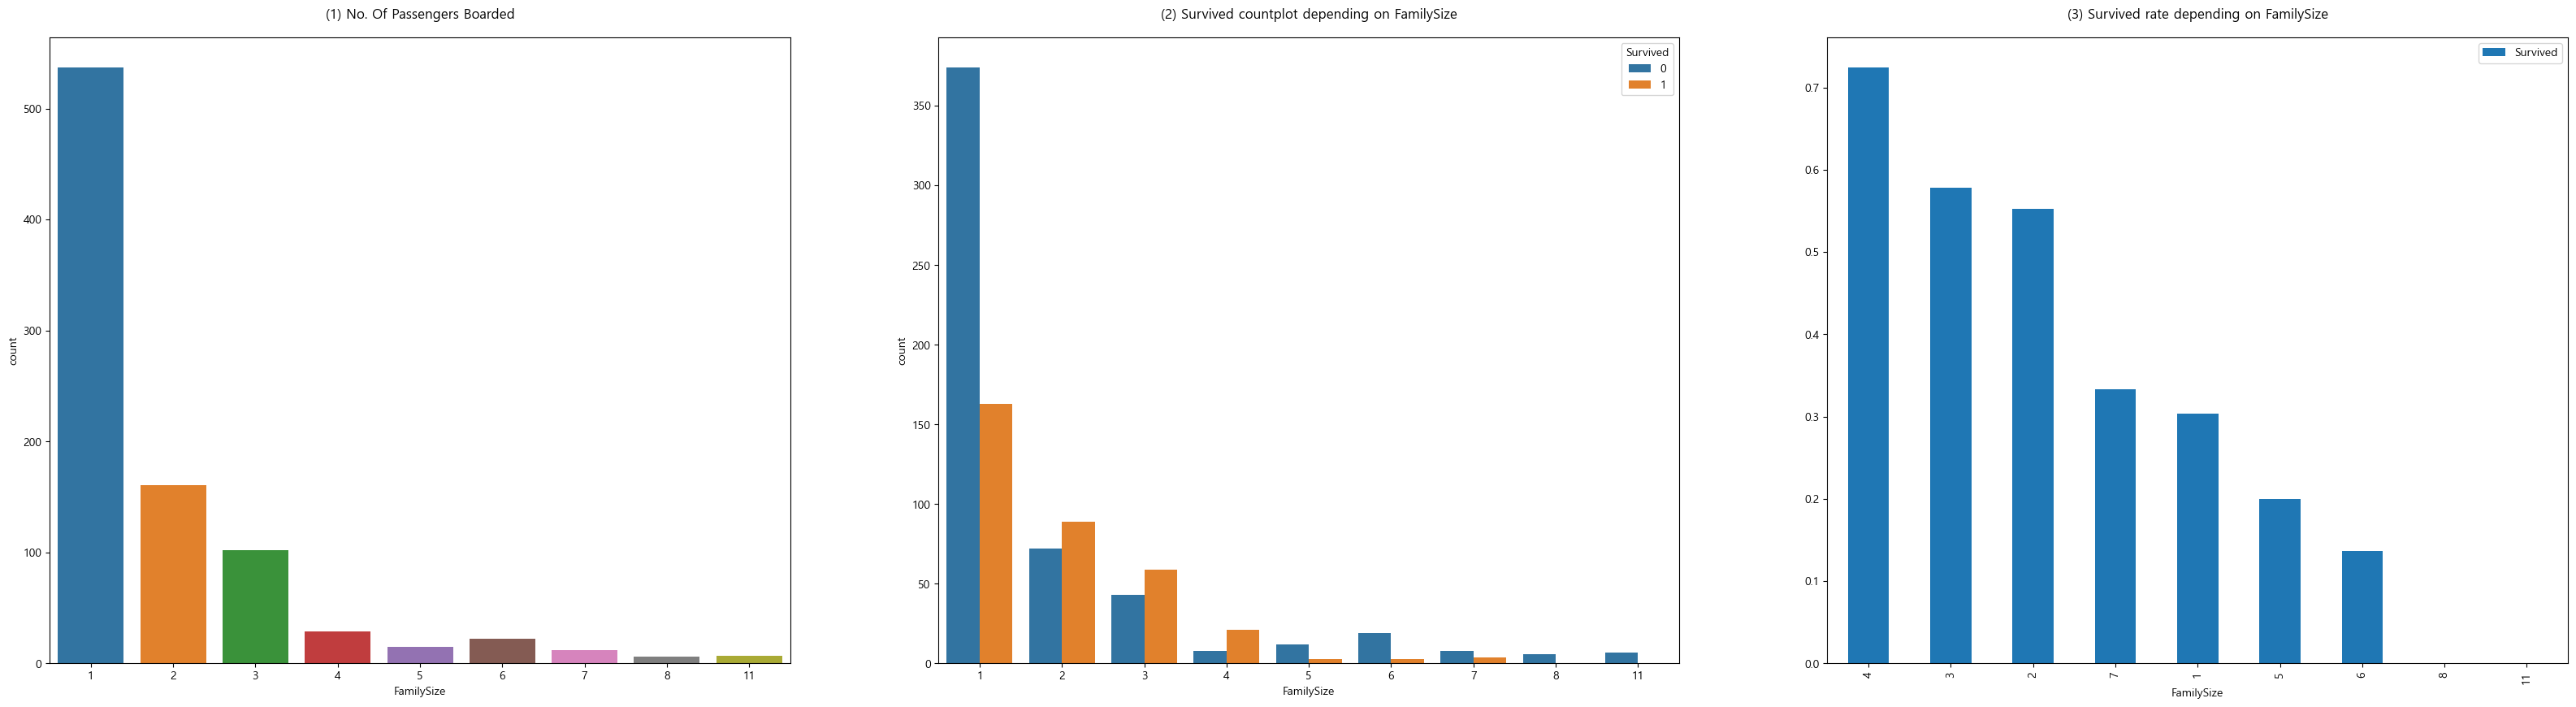

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
# df_train[['FamilySize', 'Survived']].pivot_table(index='FamilySize', values='Survived', aggfunc='mean').sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

### 2.8 Fare  

Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

In [34]:
print(df_train.Fare.skew())
df_train.Fare

4.787316519674893


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

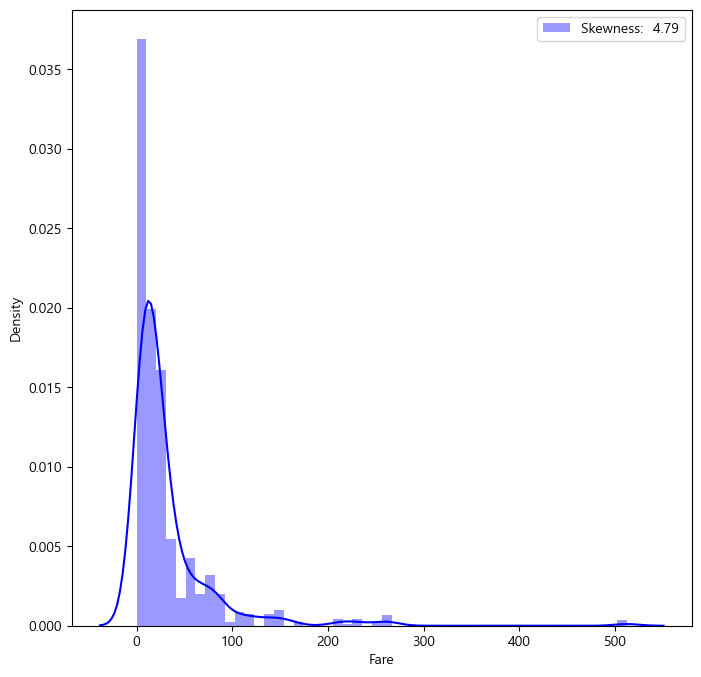

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label=f'Skewness: {df_train.Fare.skew(): .2f}', ax=ax)
# df.skew(): 왜도(or 비대칭도), 평균에 대해 최빈값이 치우쳐진 정도를 나타내는 척도
g = g.legend(loc='best')

- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.  
  
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.  
  
- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.  
  
- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [36]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() ## testset에 있는 NaN value를 평균으로 대치
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

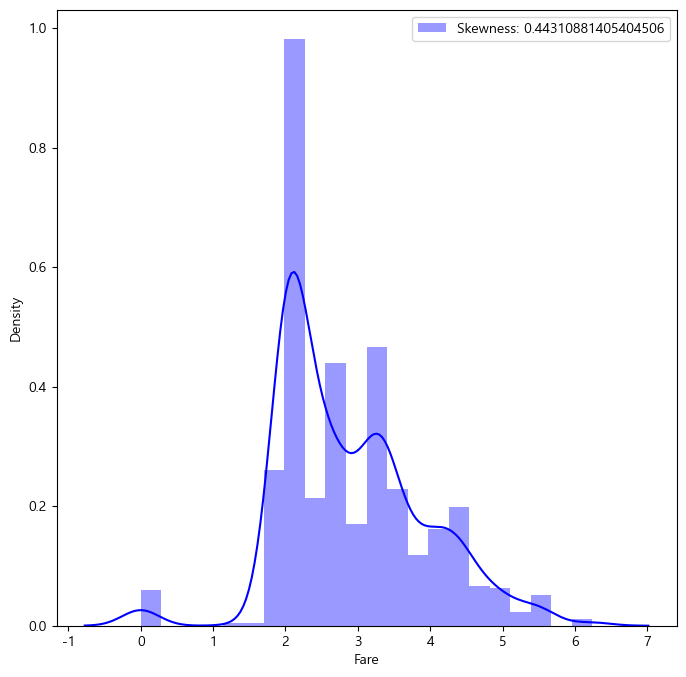

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label=f'Skewness: {df_train.Fare.skew()}', ax=ax)
g.legend(loc='best');

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.  
  
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.  
  
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.  
  
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

### 2.9 Cabin
- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.  
  
- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

### 2.10 Ticket
  
- 이 feature 는 NaN 은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [38]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

[EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)  

# EDA

In [39]:
import numpy as np, pandas as pd, matplotlib as mpl, seaborn as sns, warnings
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv('./input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

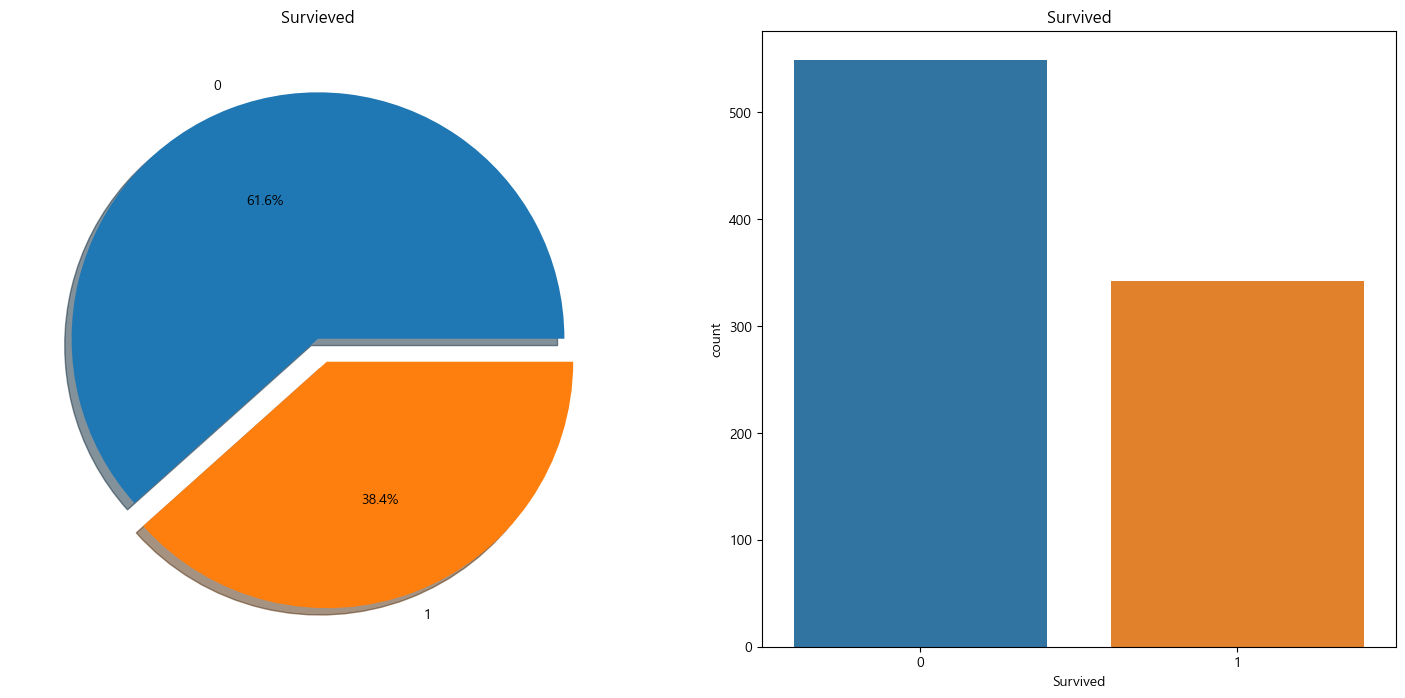

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survieved')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show();

## Types Of Features  
- Categorical Features:  
  A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
  
  Categorical Features in the dataset: Sex,Embarked.
  
- Ordinal Features:  
  An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
  
  Ordinal Features in the dataset: PClass
  
- Continous Feature:  
  A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
  
  Continous Features in the dataset: Age  
  
## Analysing The Features

In [43]:
## Sex -> Categorical Feature

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

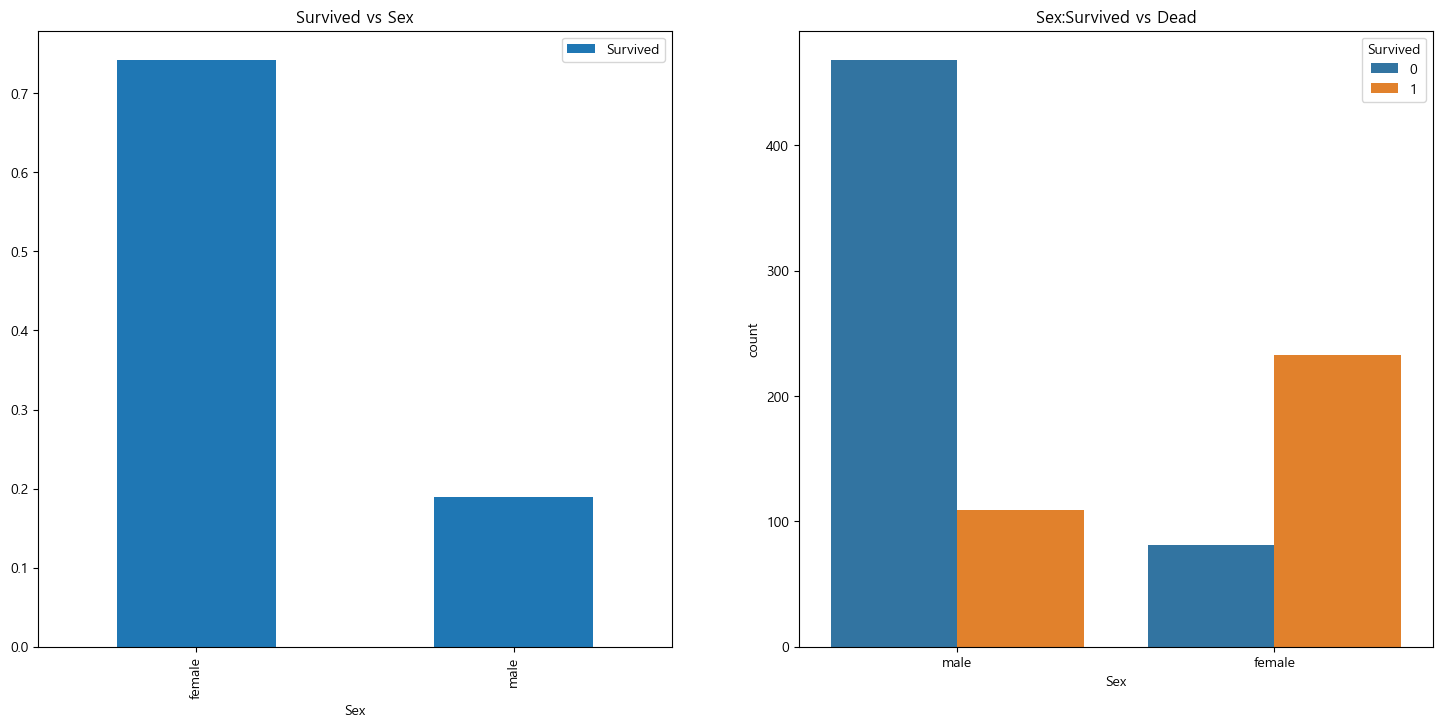

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [45]:
## Pclass --> Ordinal Feature
pd.crosstab(index=data.Pclass, columns=data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


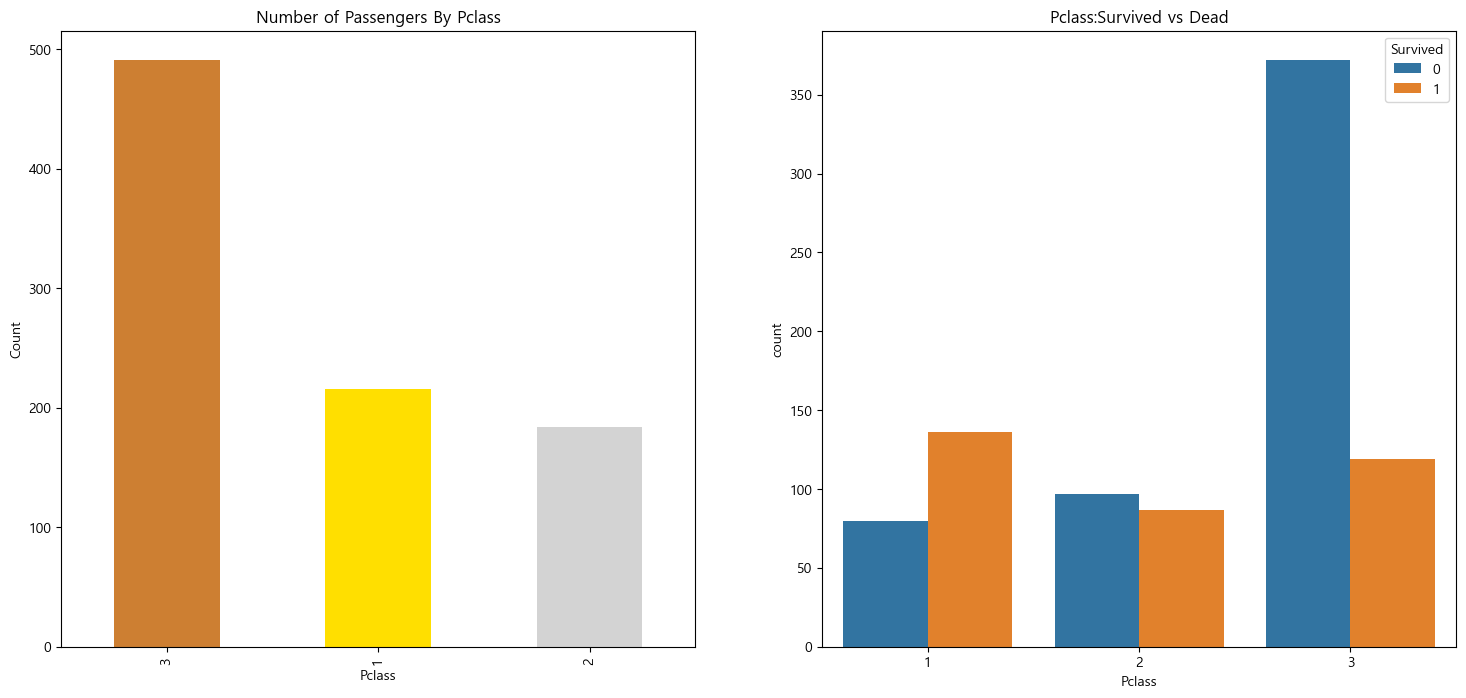

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show();

In [47]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

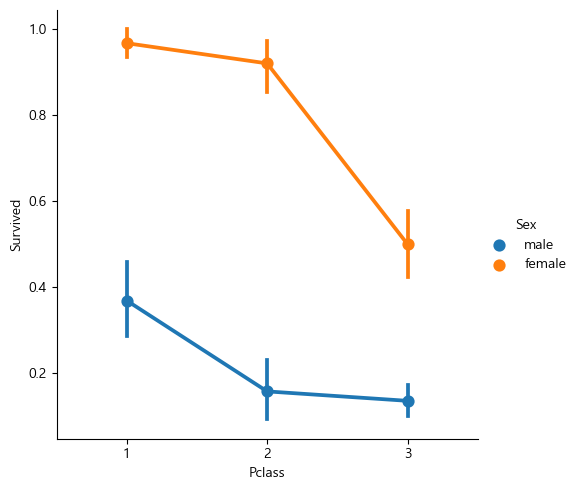

In [48]:
sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', kind='point')
plt.show();

In [49]:
## Age--> Continous Feature
print('Oldest Passenger was of:', data.Age.max(), 'Years')
print('Youngest Passenger was of:', data.Age.min(), 'Years')
print('Average Age on the ship:', round(data.Age.mean(), 2), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


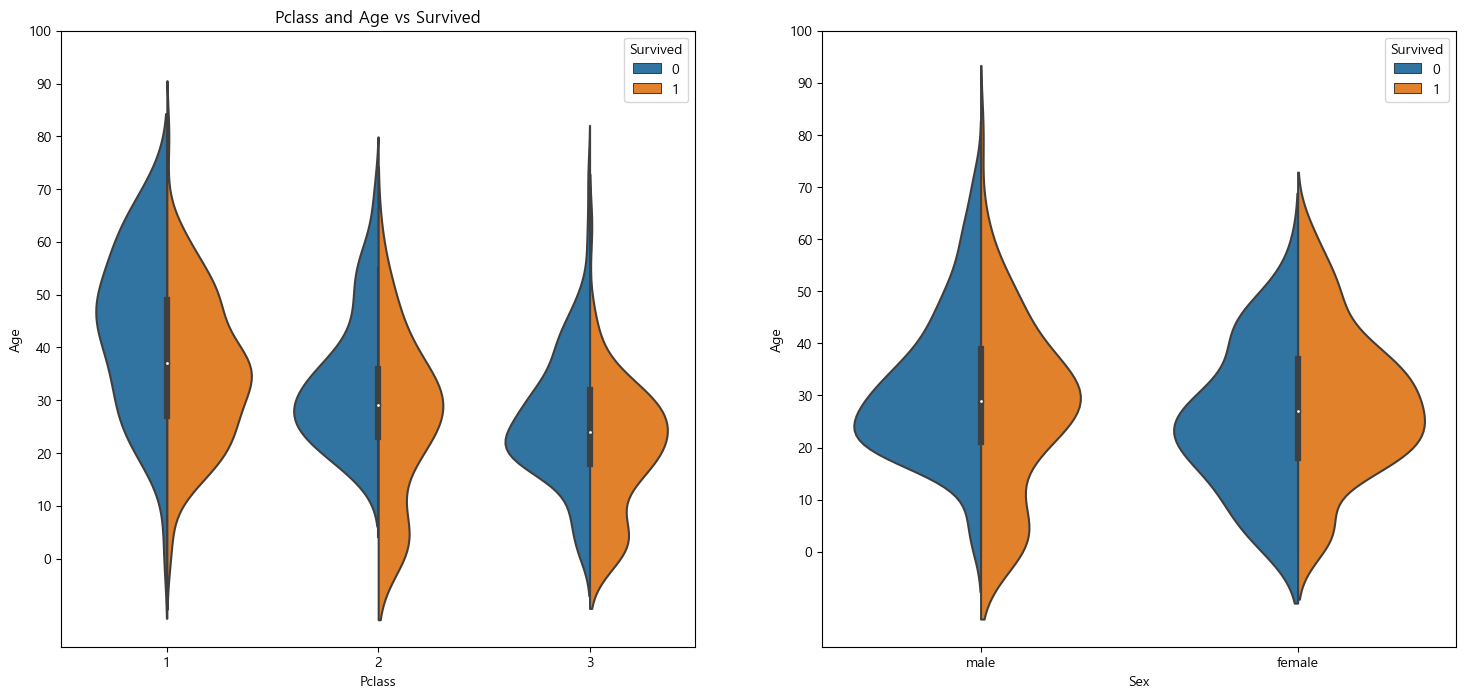

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_yticks(range(0,110,10))
plt.show();

In [51]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# .extract: 정규표현식으로 조건 문자 추출

In [52]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [53]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)
data.groupby('Initial')['Age'].mean()
# data.pivot_table(index='Initial', values='Age', aggfunc='mean')

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [54]:
tmp = data.groupby('Initial')['Age'].mean()
for title, age in tmp.items():
    data.loc[(data.Age.isnull())&(data.Initial==title), 'Age'] = round(age)
data.Age.isnull().any()
# any: 참값이 하나라도 존재하는가
# data.Age.notnull().all()
# all: 전부 참값인가

False

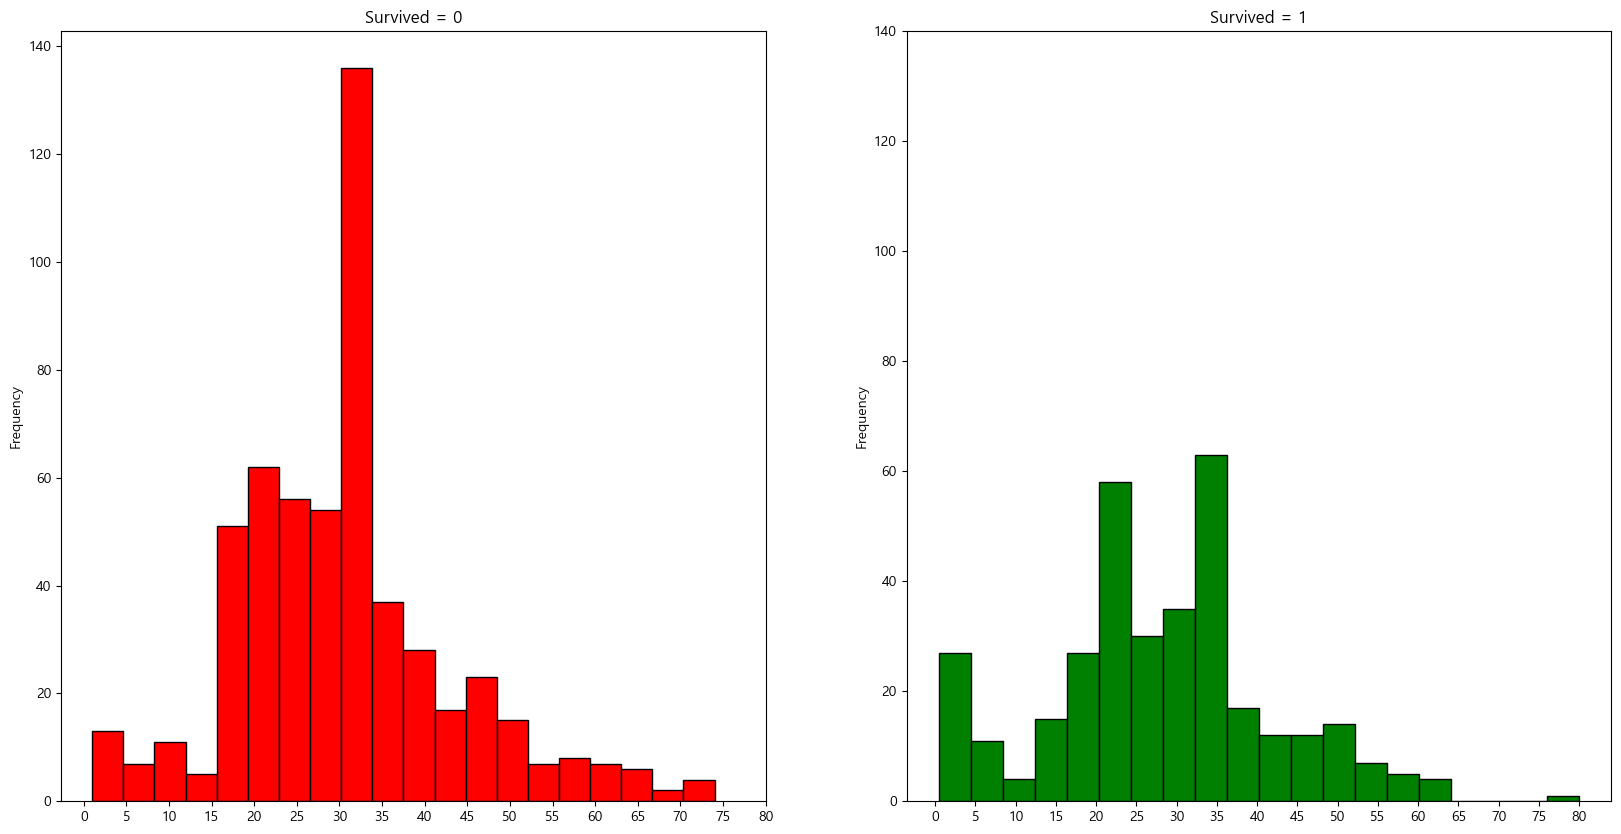

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
data[data.Survived==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
# bins: 막대 개수
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0,85,5))
ax[0].set_yticks(range(0,141,20))
data[data.Survived==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='g')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))
ax[1].set_yticks(range(0,141,20))
plt.show();

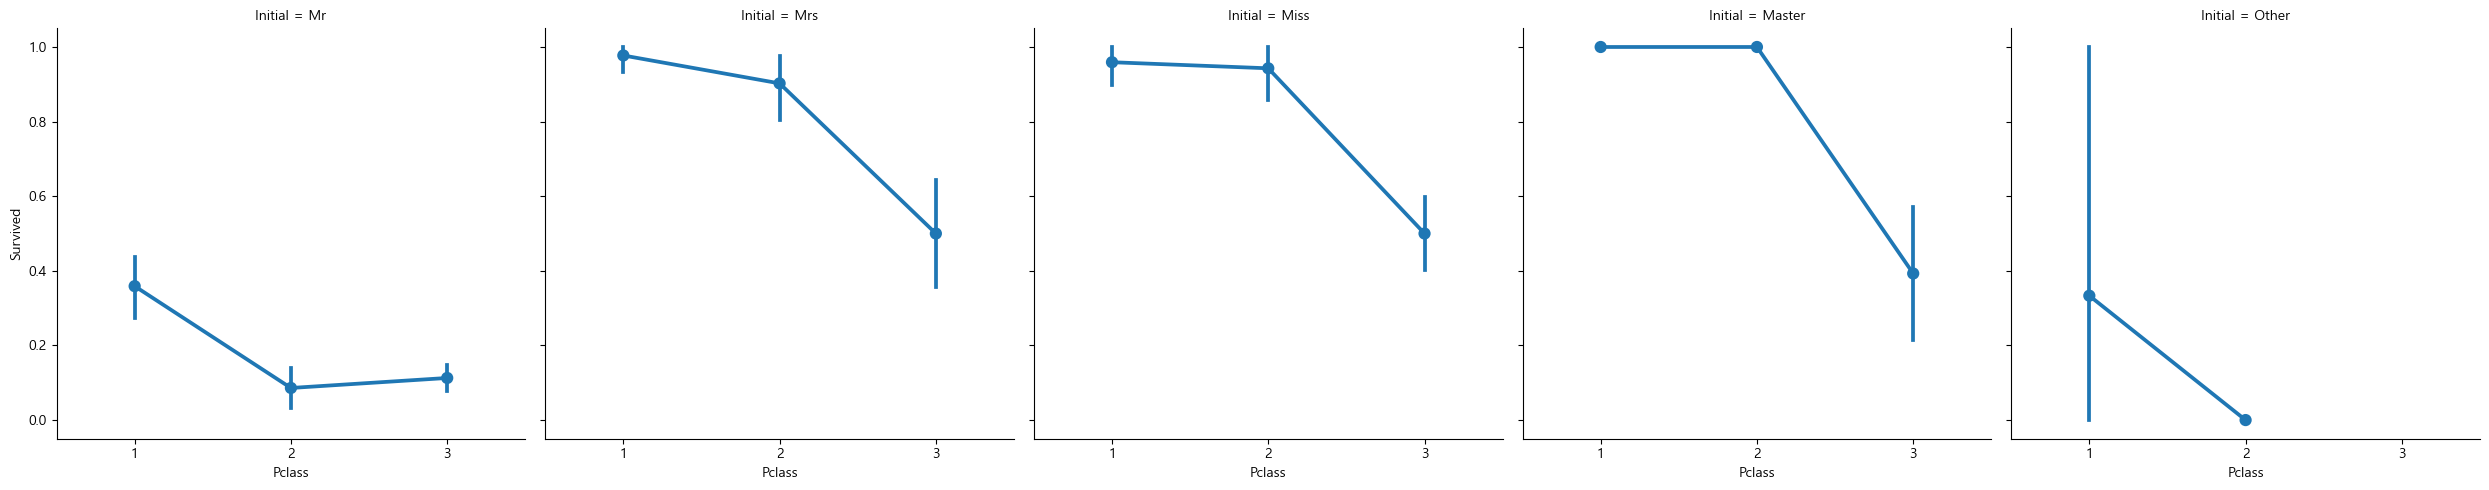

In [56]:
sns.catplot(data=data, x='Pclass', y='Survived', col='Initial', kind='point')
plt.show()

In [57]:
## Embarked -> Categorical Value
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

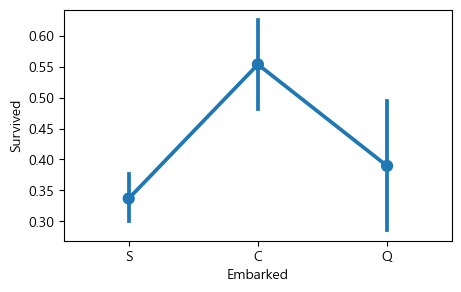

In [58]:
sns.pointplot(data=data, x='Embarked', y='Survived')
fig = plt.gcf()
# gcf: 현재 figure 반환, gca: 현재 axes 반환
fig.set_size_inches(5, 3)
plt.show;

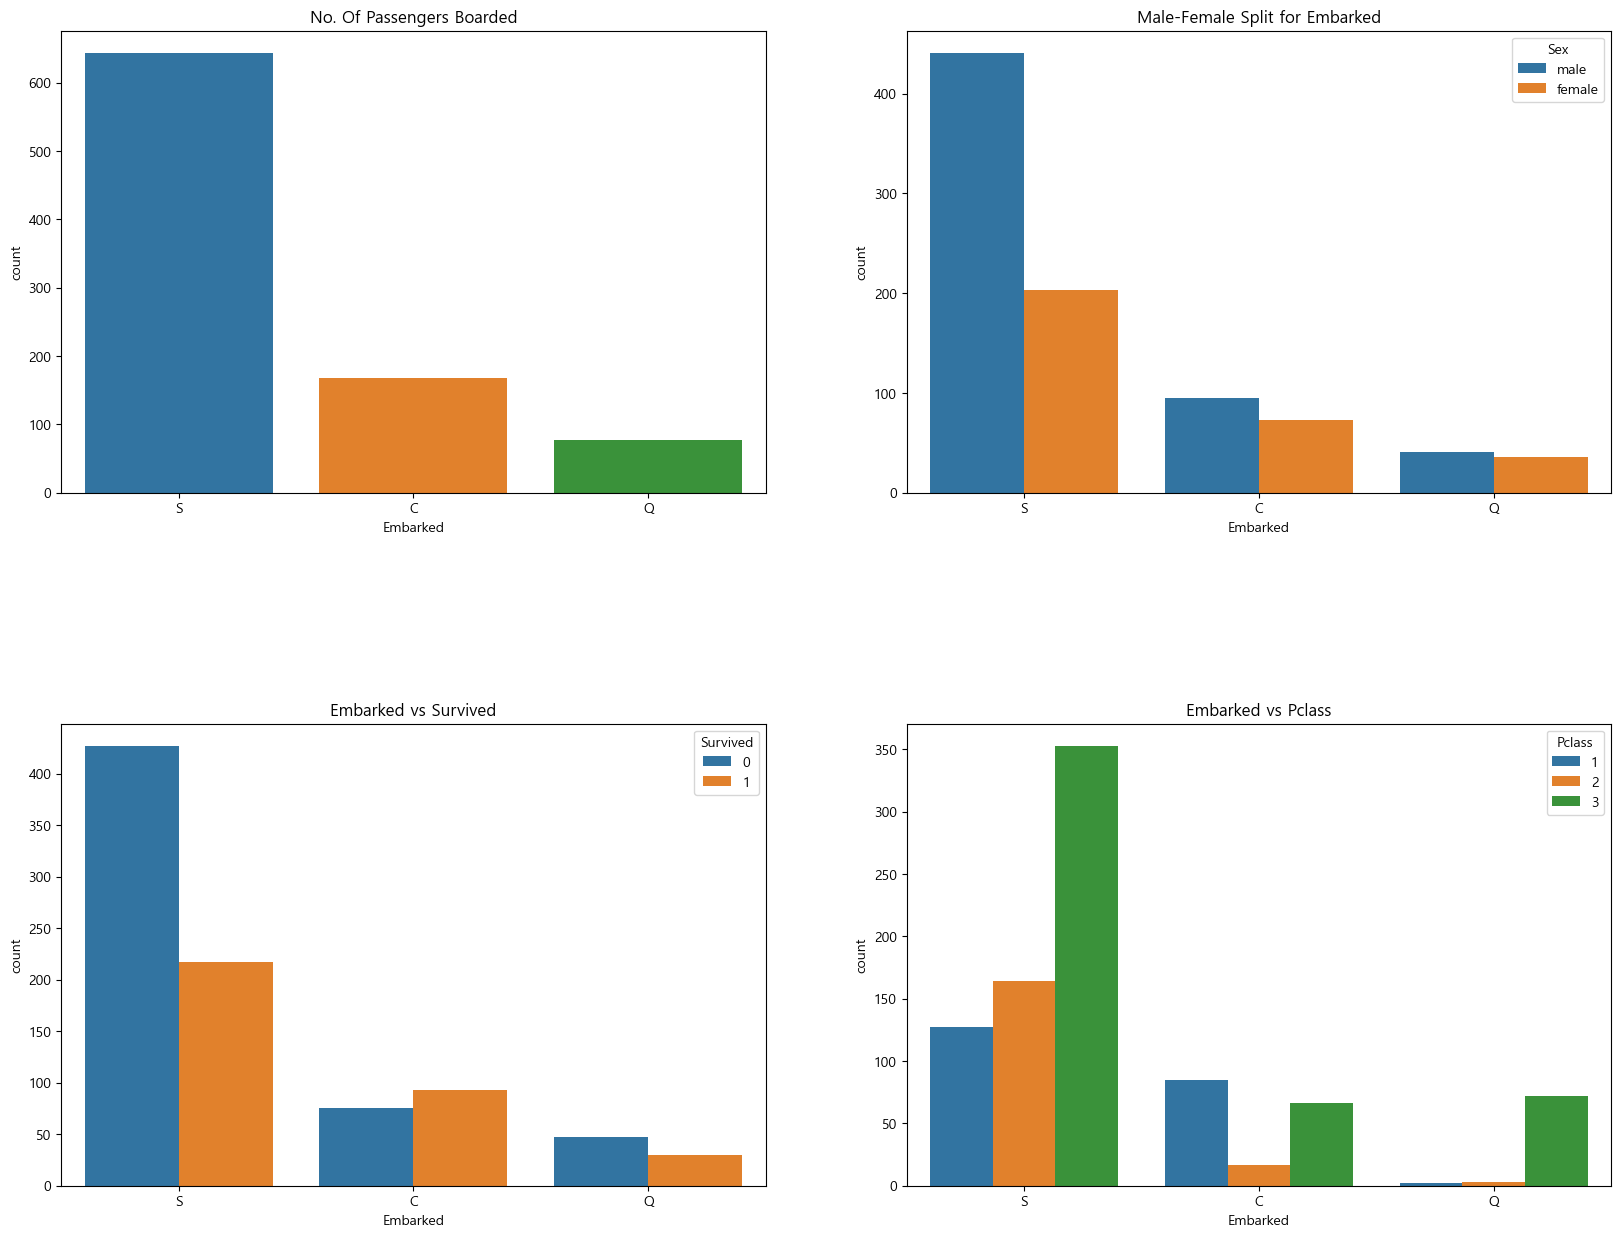

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data=data, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show();

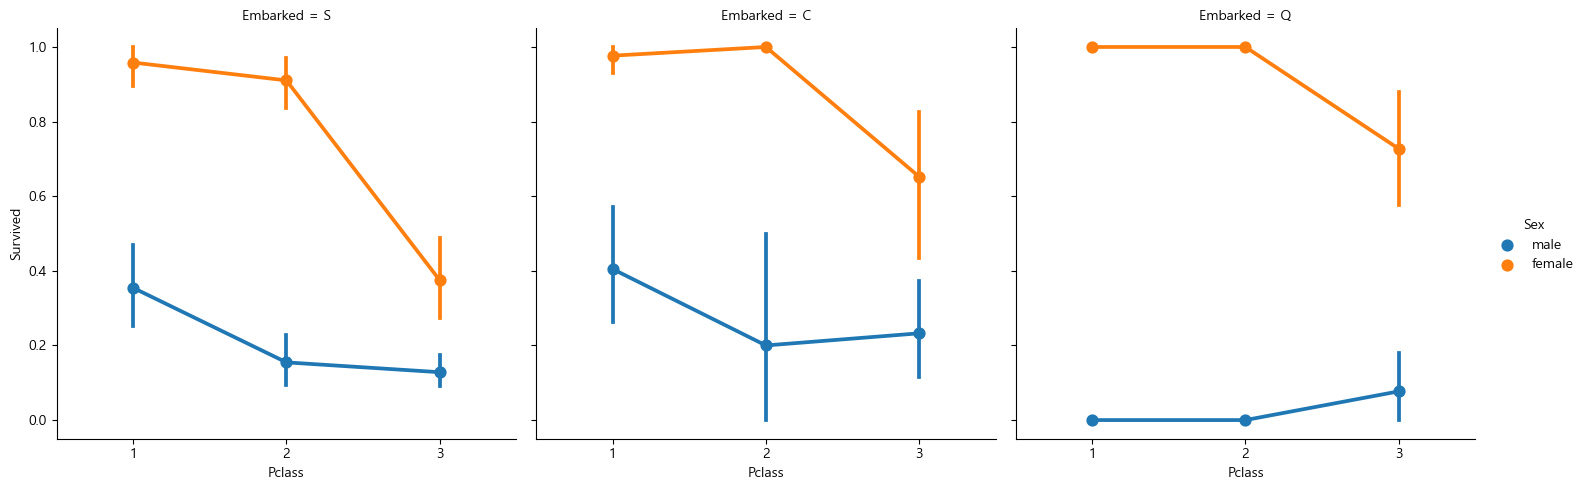

In [60]:
sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')
plt.show();

In [61]:
data.Embarked.fillna('s', inplace=True)
data.Embarked.isnull().any()

False

In [62]:
## SibSip-->Discrete Feature¶
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


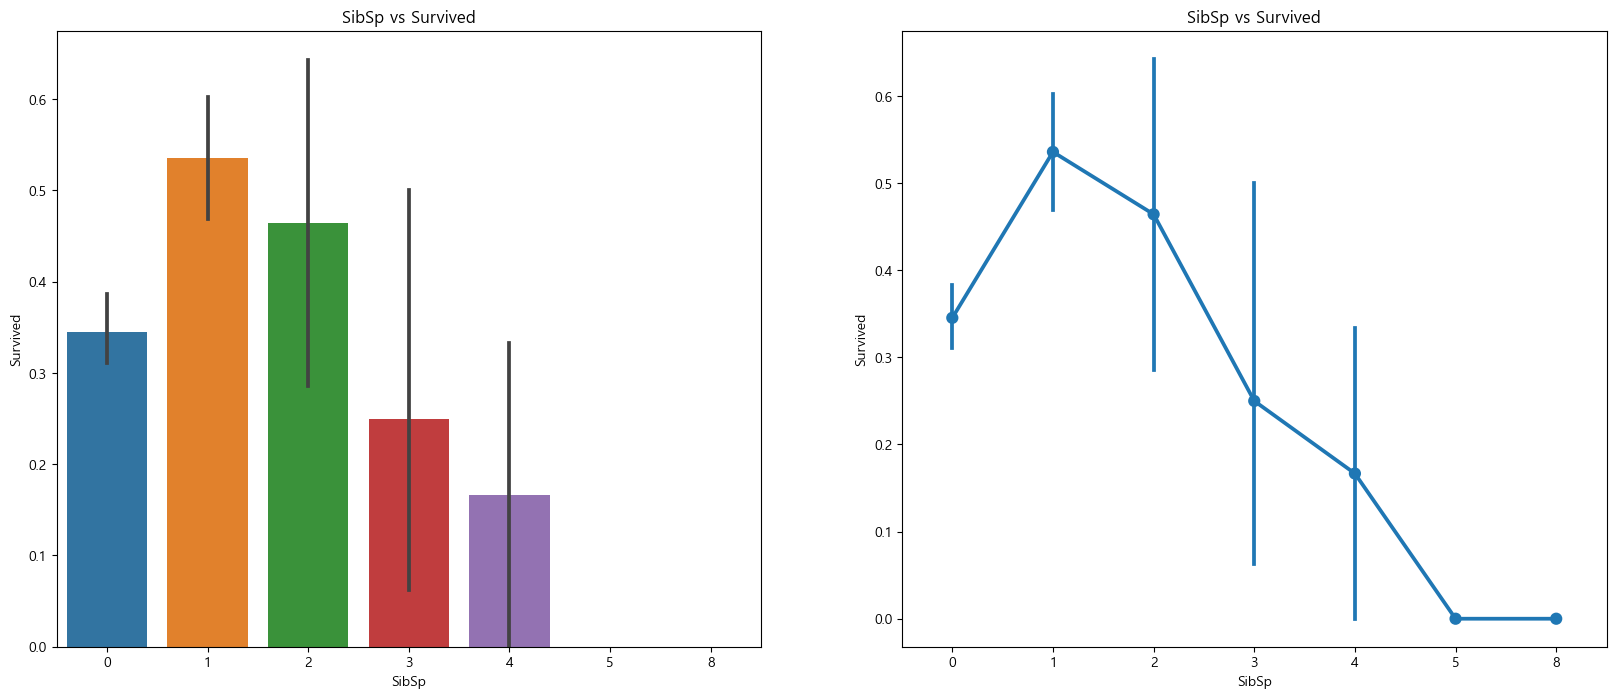

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show();

In [64]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [65]:
## Parch

pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


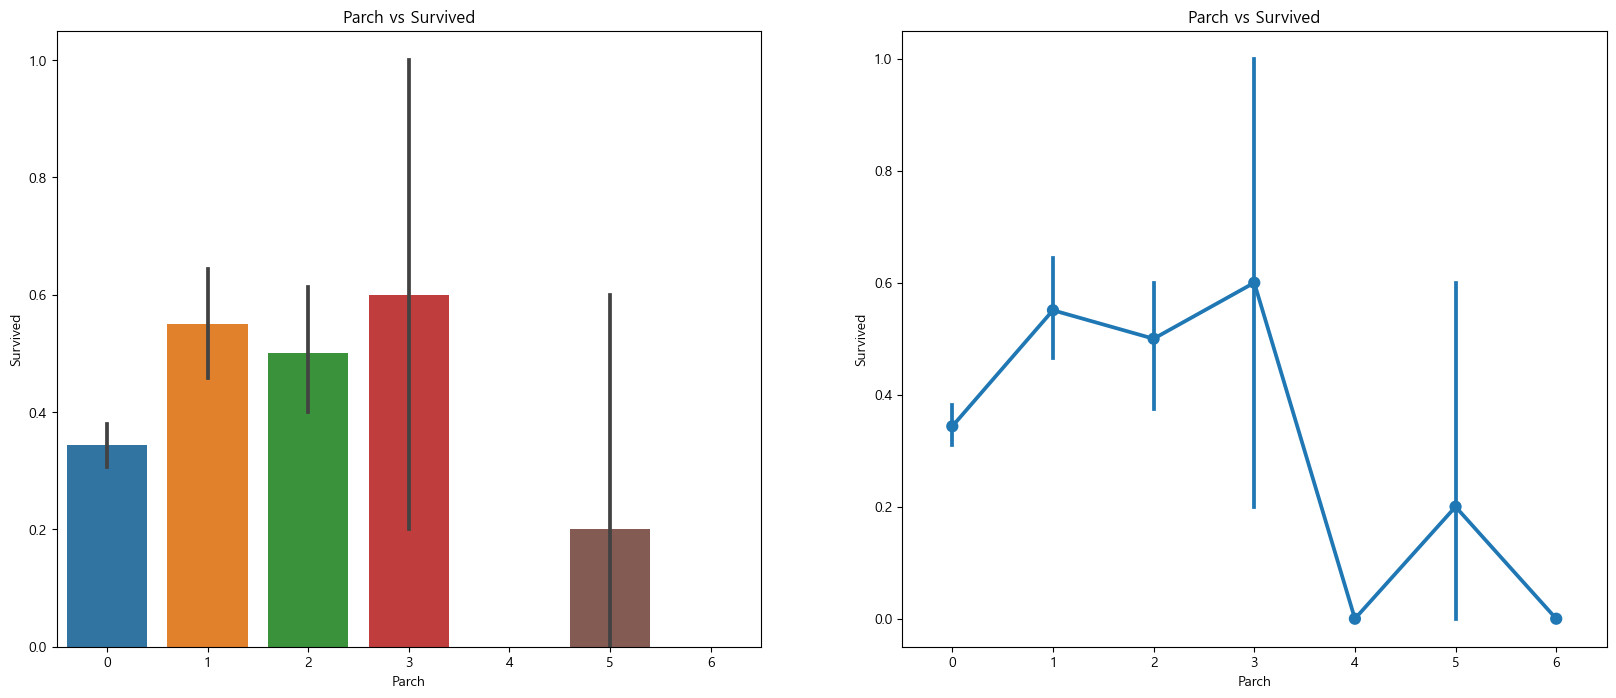

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show();

In [67]:
## Fare -> Continous Feature
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


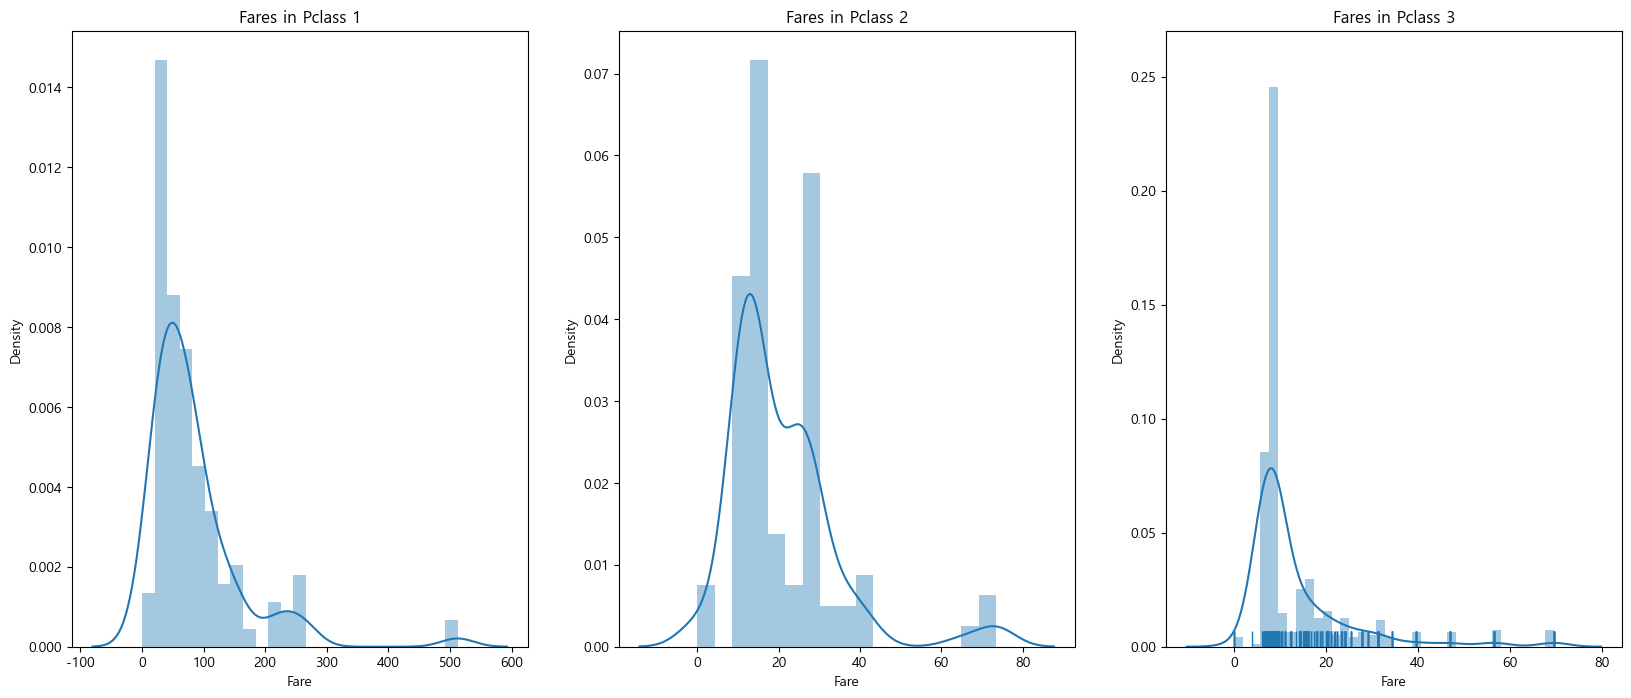

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2], kde=True, rug=True)
# kde: 커널 밀도(kernel density)로 분포 곡선 표기
# rug: 선분(rug)로 실제 데이터 위치 표기
ax[2].set_title('Fares in Pclass 3')
plt.show();

### 원문
Observations in a Nutshell for all features:  
  
Sex: The chance of survival for women is high as compared to men.  
  
Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.  

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.  
  
Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.  
  
Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.  
  
### Deepl 번역
모든 기능에 대한 관찰 결과 요약:  
  
성별: 여성이 남성에 비해 생존 확률이 높습니다.  
  
클래스: 1등석 승객일수록 생존 확률이 높아지는 경향이 뚜렷합니다. P클래스3의 생존율은 매우 낮습니다. 여성의 경우, P클래스1의 생존 확률은 거의 1에 가깝고 P클래스2의 생존 확률도 높습니다. 돈이 이긴다!!!.  
  
나이: 5-10세 미만의 어린이는 생존 확률이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.  
  
승선: 이것은 매우 흥미로운 특징입니다. C에서의 생존 가능성은 대부분의 P클래스1 승객이 S에서 일어났음에도 불구하고 Q의 승객이 모두 P클래스3 출신인 것보다 더 나은 것으로 보입니다.  
  
Parch+SibSp: 혼자 탑승하거나 대가족이 함께 여행하는 것보다 1~2명의 형제자매, 배우자 또는 1~3명의 부모님이 탑승하는 것이 더 높은 확률을 보입니다.  

## Correlation Between The Features

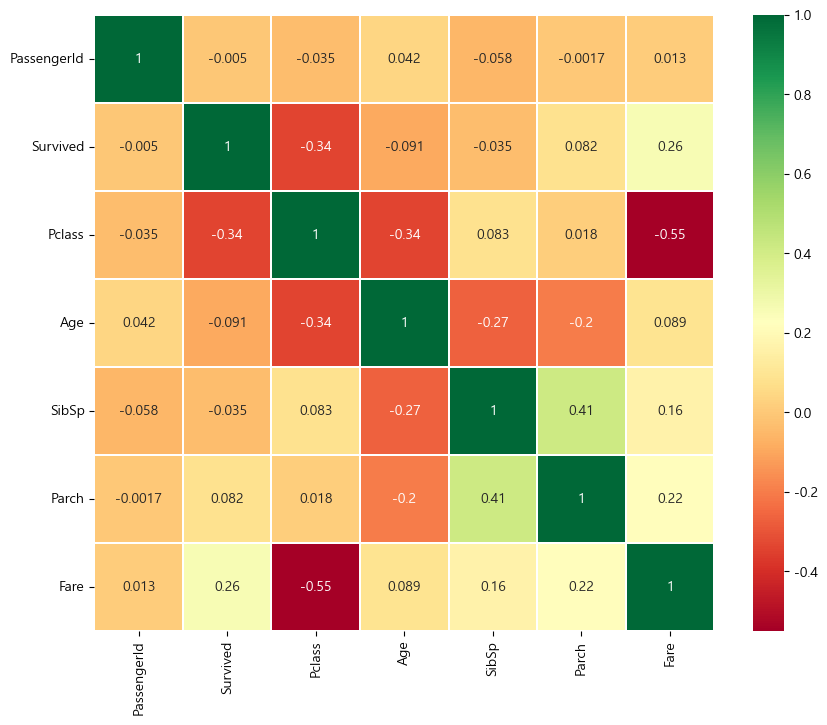

In [69]:
data2 = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show();

# data2 = data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
# plt.figure(figsize=(10,8))
# sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# plt.show();

### 원문
Interpreting The Heatmap  

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.  
  
POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.  
  
NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.  
  
Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.  
  
So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.  
  
Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.  
  
### DeepL 번역
히트맵 해석하기  
  
가장 먼저 주목해야 할 점은 알파벳이나 문자열 간의 상관관계는 알 수 없으므로 숫자 특징만 비교한다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.  
  
양의 상관관계: 특징 A의 증가가 특징 B의 증가로 이어지면 양의 상관관계가 있는 것입니다. 값이 1이면 완벽한 양의 상관관계를 의미합니다.  
  
음의 상관관계: 기능 A의 증가가 기능 B의 감소로 이어지면 음의 상관관계입니다. 값 -1은 완벽한 음의 상관관계를 의미합니다.  
  
이제 두 피처의 상관관계가 매우 높거나 완벽하여 한 피처의 증가가 다른 피처의 증가로 이어진다고 가정해 보겠습니다. 이는 두 특징이 매우 유사한 정보를 포함하고 있으며 정보의 분산이 거의 없거나 전혀 없다는 것을 의미합니다. 두 특징 모두 거의 동일한 정보를 포함하고 있기 때문에 이를 다중선형성이라고 합니다.  
  
그렇다면 둘 중 하나는 중복되므로 둘 다 사용해야 할까요? 모델을 만들거나 학습할 때 중복 기능을 제거하면 학습 시간이 단축되는 등 여러 가지 이점이 있으므로 중복 기능을 제거하도록 노력해야 합니다.  
  
이제 위의 히트맵에서 특징들 간의 상관관계가 크지 않다는 것을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이의 상관관계, 즉 0.41입니다. 따라서 모든 기능을 계속 사용할 수 있습니다.

## Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?  
  
Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.  
  
An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

In [70]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')
# to_frame: DataFrame으로 변환

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


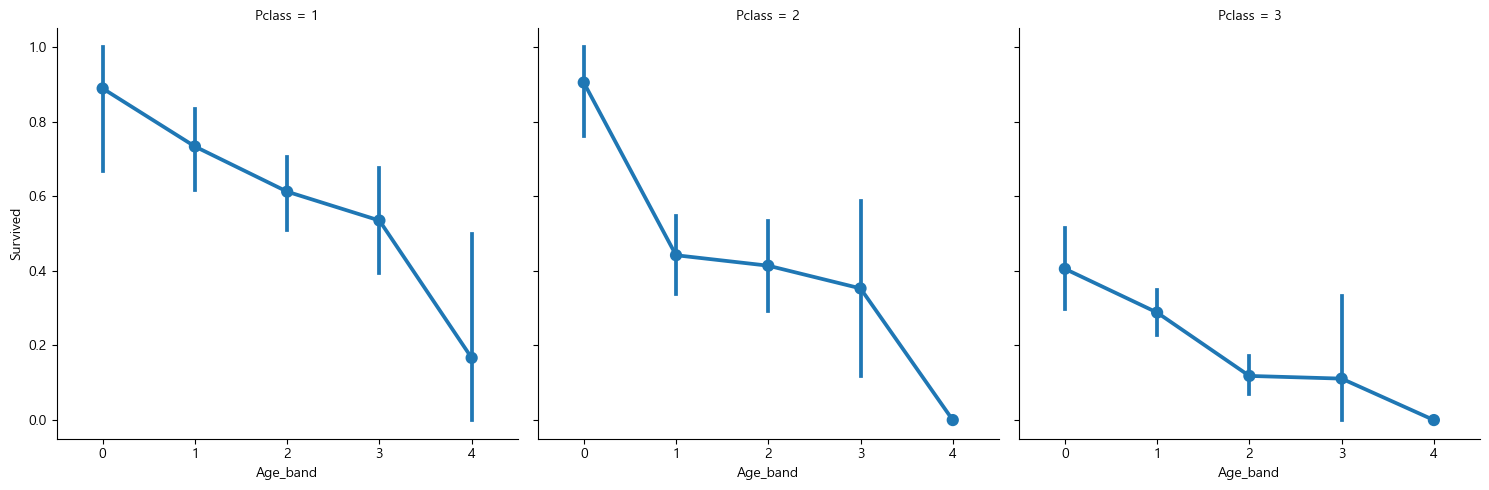

In [71]:
sns.catplot(data=data, x='Age_band', y='Survived', col='Pclass', kind='point');

### Family_Size and Alone

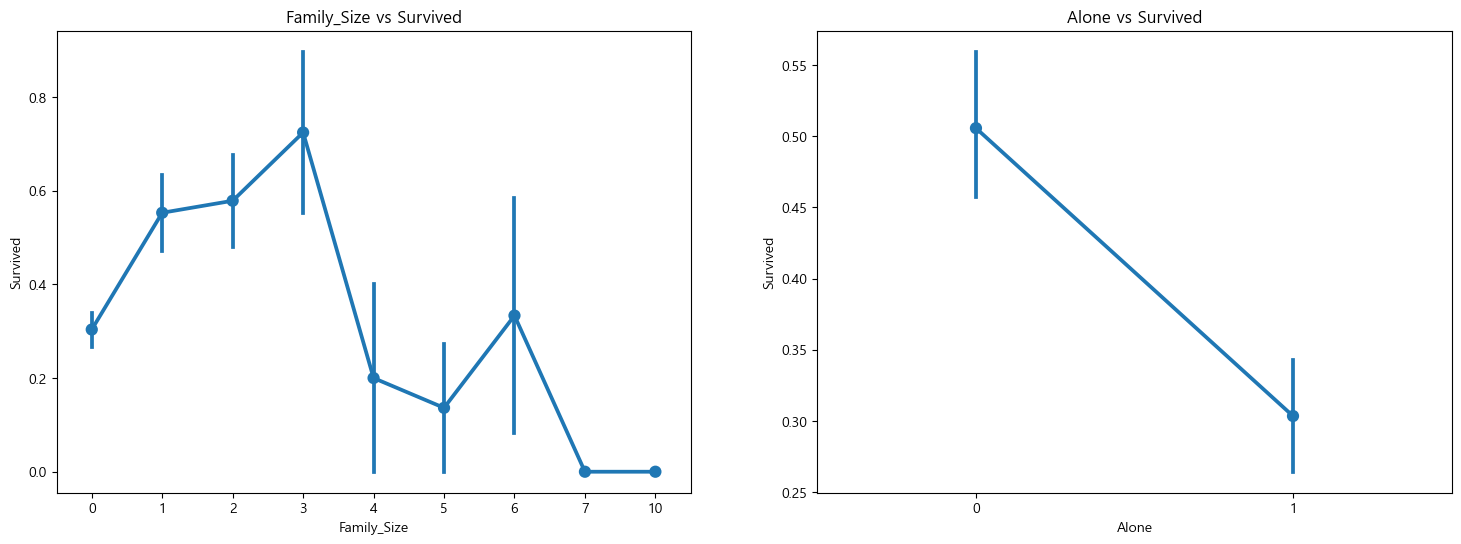

In [72]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

## 아래 코드가 원본 코드인데 subplot에 들어가지 않는다. factorplot과 catplot의 차이인 듯
# fig, ax = plt.subplots(1, 2, figsize=(18,6))
# sns.catplot(data=data, x='Family_Size', y='Survived', ax=ax[0], kind='point')
# ax[0].set_title('Family_Size vs Survived')
# sns.catplot(data=data, x='Alone', y='Survived', ax=ax[1], kind='point')
# ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.pointplot(data=data, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(data=data, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

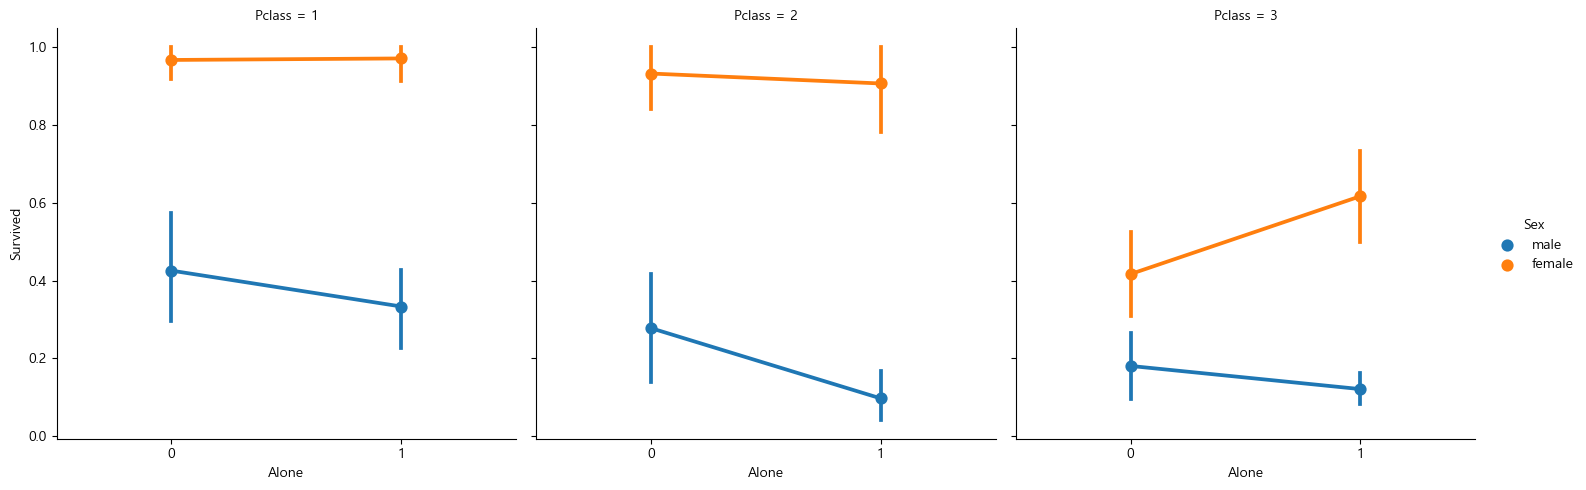

In [73]:
sns.catplot(data=data, x='Alone', y='Survived', hue='Sex', col='Pclass', kind='point')
plt.show()

### Fare_Range
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.  
  
So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.  

### DeepL 번역
요금도 연속적인 기능이기 때문에 서수 값으로 변환해야 합니다. 이를 위해 pandas.qcut을 사용합니다.

qcut은 우리가 전달한 구간차원 수에 따라 값을 분할하거나 정렬합니다. 따라서 5개의 구간차원을 전달하면 값을 5개의 개별 구간차원 또는 값 범위로 동일한 간격으로 정렬합니다.

In [74]:
data['Fare_Range'] = pd.qcut(x=data['Fare'], q=4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')
# data.pivot_table(index='Fare_Range', values='Survived', aggfunc='mean').style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


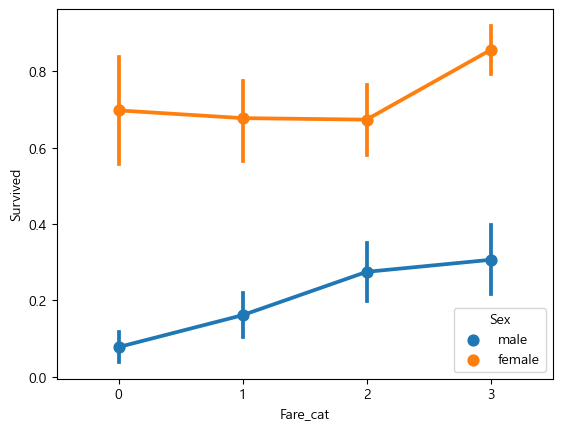

In [75]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[data['Fare']>31, 'Fare_cat'] = 3
sns.pointplot(data=data, x='Fare_cat', y= 'Survived', hue='Sex')
plt.show();

### Converting String Values into Numeric

In [76]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 's', 'C', 'Q'], [0,0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)
data[['Sex', 'Embarked', 'Initial']].head()

,Sex,Embarked,Initial
0,0,0,0
1,1,1,1
2,1,0,2
3,1,0,1
4,0,0,0


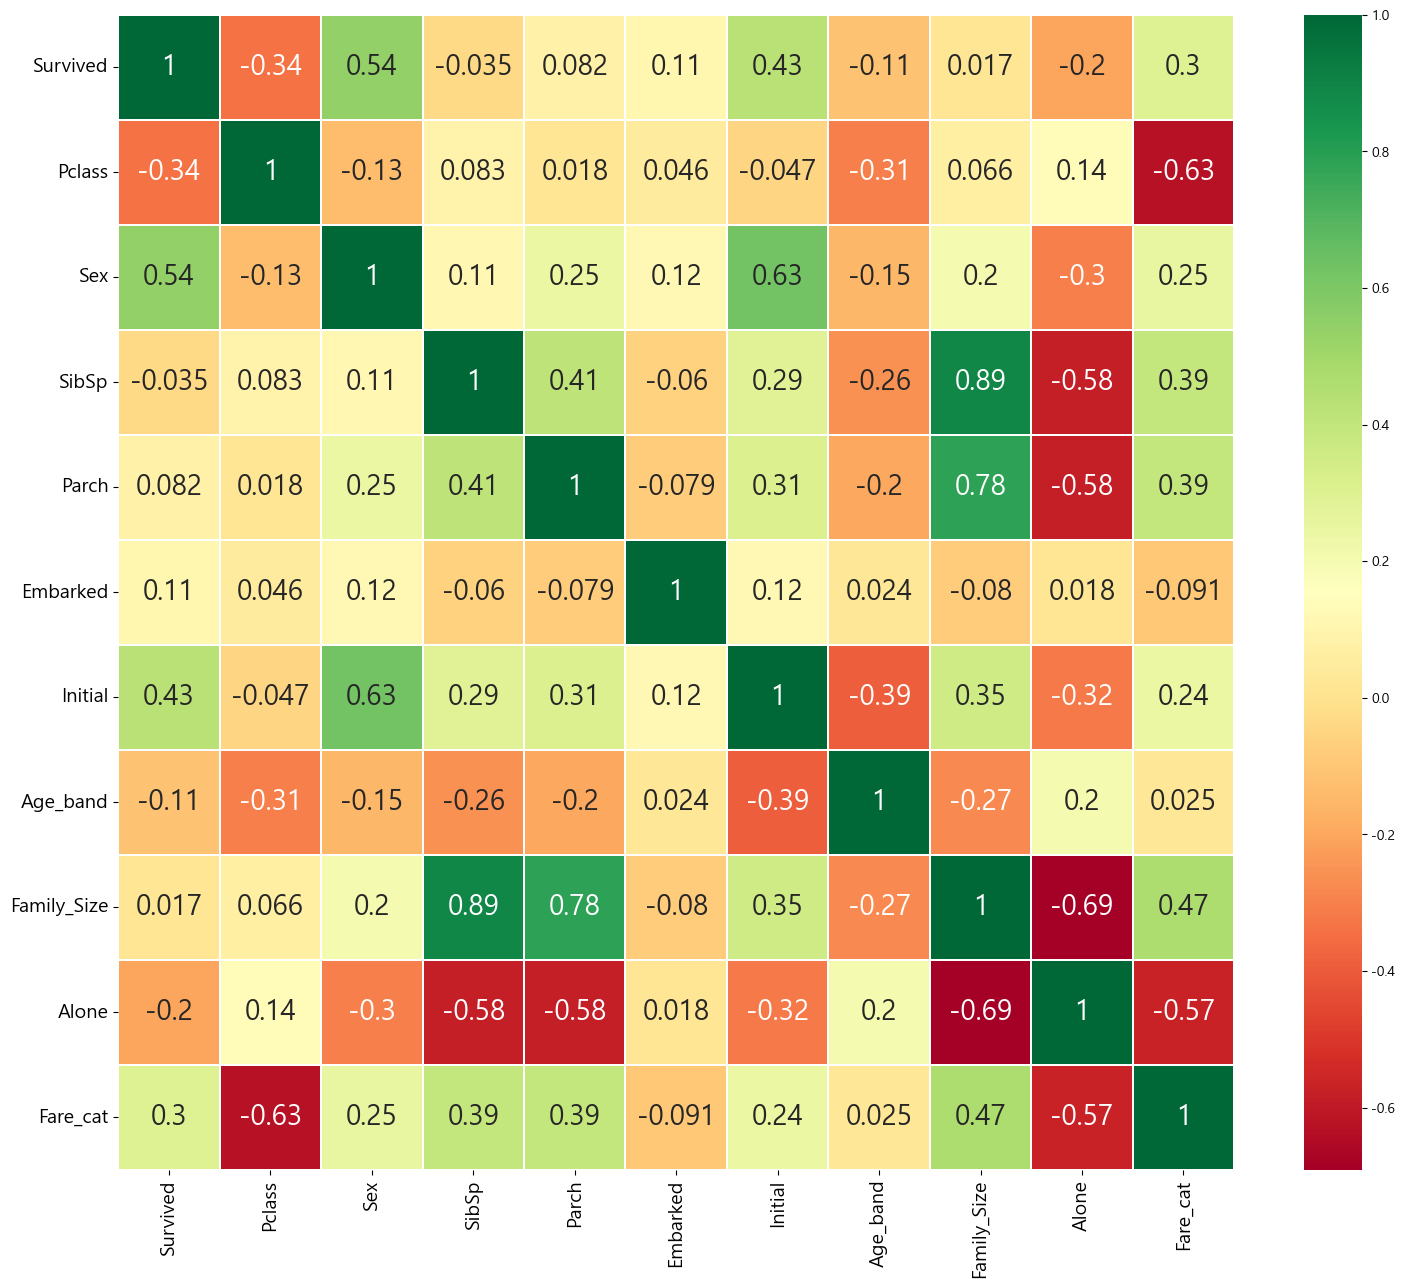

In [77]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show();

## Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix

In [79]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# stratify: 데이터 비율 맞춰서 배분

train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']

## X, y로 train_test_split 사용할 경우
# X = data[data.columns[1:]]
# y = data['Survived']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=data['Survived'])

In [80]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_y))

Accuracy for rbf SVM is 0.835820895522388


In [81]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_y))

Accuracy for linear SVM is 0.8171641791044776


In [82]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction3 = model.predict(test_X)
print('Accuracy for LogisticRegression is', metrics.accuracy_score(prediction3, test_y))

Accuracy for LogisticRegression is 0.8134328358208955


In [83]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction4 = model.predict(test_X)
print('Accuracy for DecisionTreeClassifier is', metrics.accuracy_score(prediction4, test_y))

Accuracy for DecisionTreeClassifier is 0.8097014925373134


In [84]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction5 = model.predict(test_X)
print('Accuracy for KNeighborsClassifier is', metrics.accuracy_score(prediction5, test_y))

Accuracy for KNeighborsClassifier is 0.8134328358208955


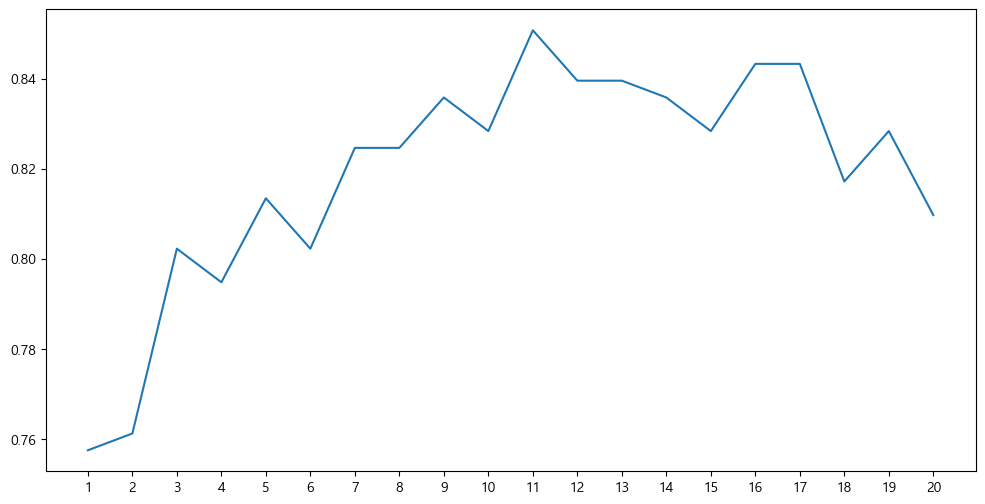

Accuracies for different value of n are: [0.7574626865671642, 0.7611940298507462, 0.8022388059701493, 0.7947761194029851, 0.8134328358208955, 0.8022388059701493, 0.8246268656716418, 0.8246268656716418, 0.835820895522388, 0.8283582089552238, 0.8507462686567164, 0.8395522388059702, 0.8395522388059702, 0.835820895522388, 0.8283582089552238, 0.8432835820895522, 0.8432835820895522, 0.8171641791044776, 0.8283582089552238, 0.8097014925373134] 
with the max value as 0.8507462686567164


In [85]:
a = []
a_index = list(range(1,21))

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a.append(metrics.accuracy_score(prediction, test_y))

plt.plot(a_index, a)
plt.xticks(a_index)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different value of n are:', a, '\nwith the max value as', max(a))

In [86]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction6 = model.predict(test_X)
print('Accuracy for NaveBayes is', metrics.accuracy_score(prediction6, test_y))

Accuracy for NaveBayes is 0.8134328358208955


In [87]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_y)
prediction7 = model.predict(test_X)
print('Accuracy for Random Forests is', metrics.accuracy_score(prediction7, test_y))

Accuracy for Random Forests is 0.8246268656716418


In [88]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict   

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]

classifiers = ['Radial Svm', 'Linear Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='rbf'), 
        svm.SVC(kernel='linear'), 
        LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=9), 
        DecisionTreeClassifier(), 
        GaussianNB(), 
        RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Radial Svm,0.828377,0.057096
Linear Svm,0.784607,0.057841
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.805855,0.045699
Naive Bayes,0.795843,0.054861
Random Forest,0.820474,0.043555


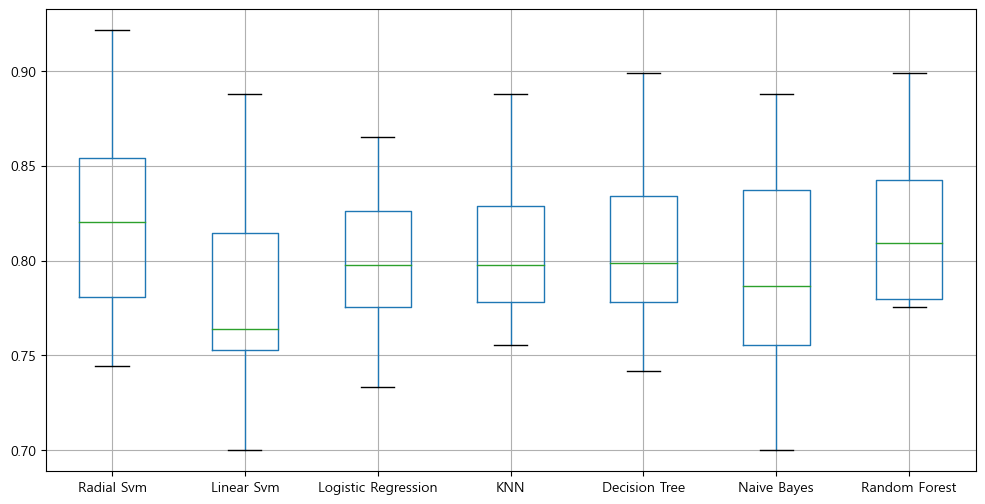

In [89]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot();

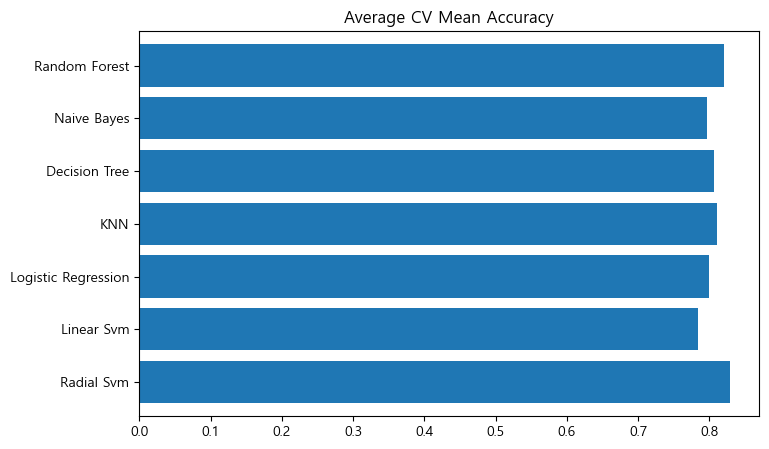

In [90]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

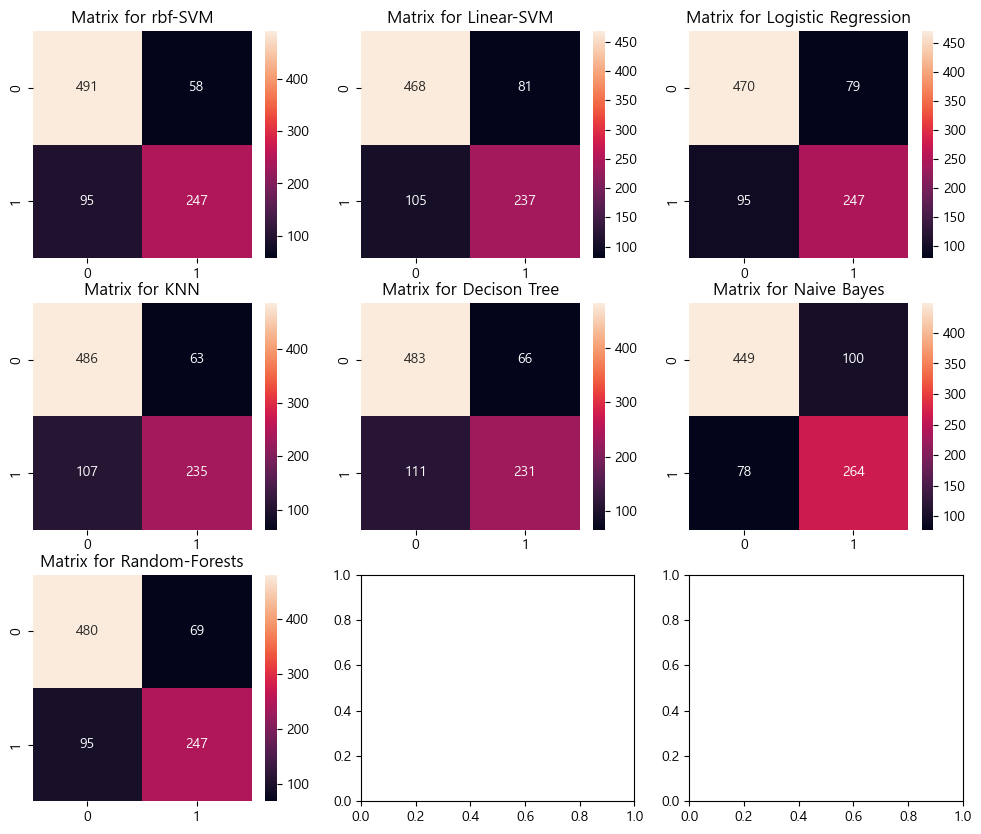

In [91]:
# Counfusion Matrix
['Radial Svm', 'Linear Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
fig, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Decison Tree')

y_pred = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Random-Forests')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Hyper-Parameters Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
## SVM
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
kernel = ['rbf', 'linear']
hyper_parameter = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [94]:
## Random Forests
n_estimators=range(100, 1000, 100)
max_depth = [1,3,5,7,10]
hyper_parameter = {'n_estimators': n_estimators, 'max_depth': max_depth}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
0.8327537505492437
RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)


### Ensembling

In [95]:
## Voting Classifier

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_y))
cross = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8226716604244693


In [96]:
## Bagging
### Bagged KNN

from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated accuracy for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated accuracy for bagged KNN is: 0.8104244694132333


In [97]:
### Bagged Desicsion Tree

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy for bagged Desicsion Tree is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated accuracy for bagged Desicsion Tree is:', result.mean())

The accuracy for bagged Desicsion Tree is: 0.8208955223880597
The cross validated accuracy for bagged Desicsion Tree is: 0.8171410736579275


In [98]:
### Boosting
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())
print('='*80)

#### Hyper-parameter Tuning for AdaBoost
n_estimators = list(range(100,1100,100))
learn_rate = [.05, .1, .2, .25, .3, .4, .5, .6, .7, .8, .9, 1.]
hyper_parameter = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper_parameter, verbose=1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

The cross validated score for Gradient Boosting is: 0.8249188514357055
Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [100]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


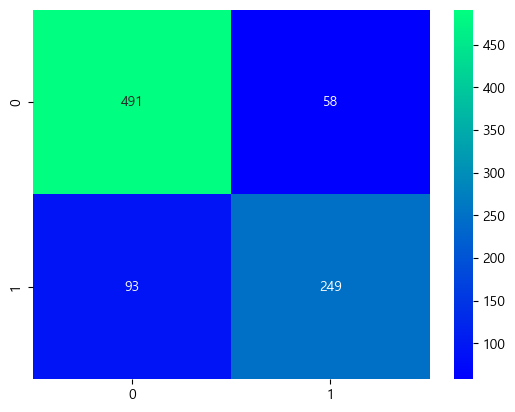

In [101]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show();

## Feature Importance

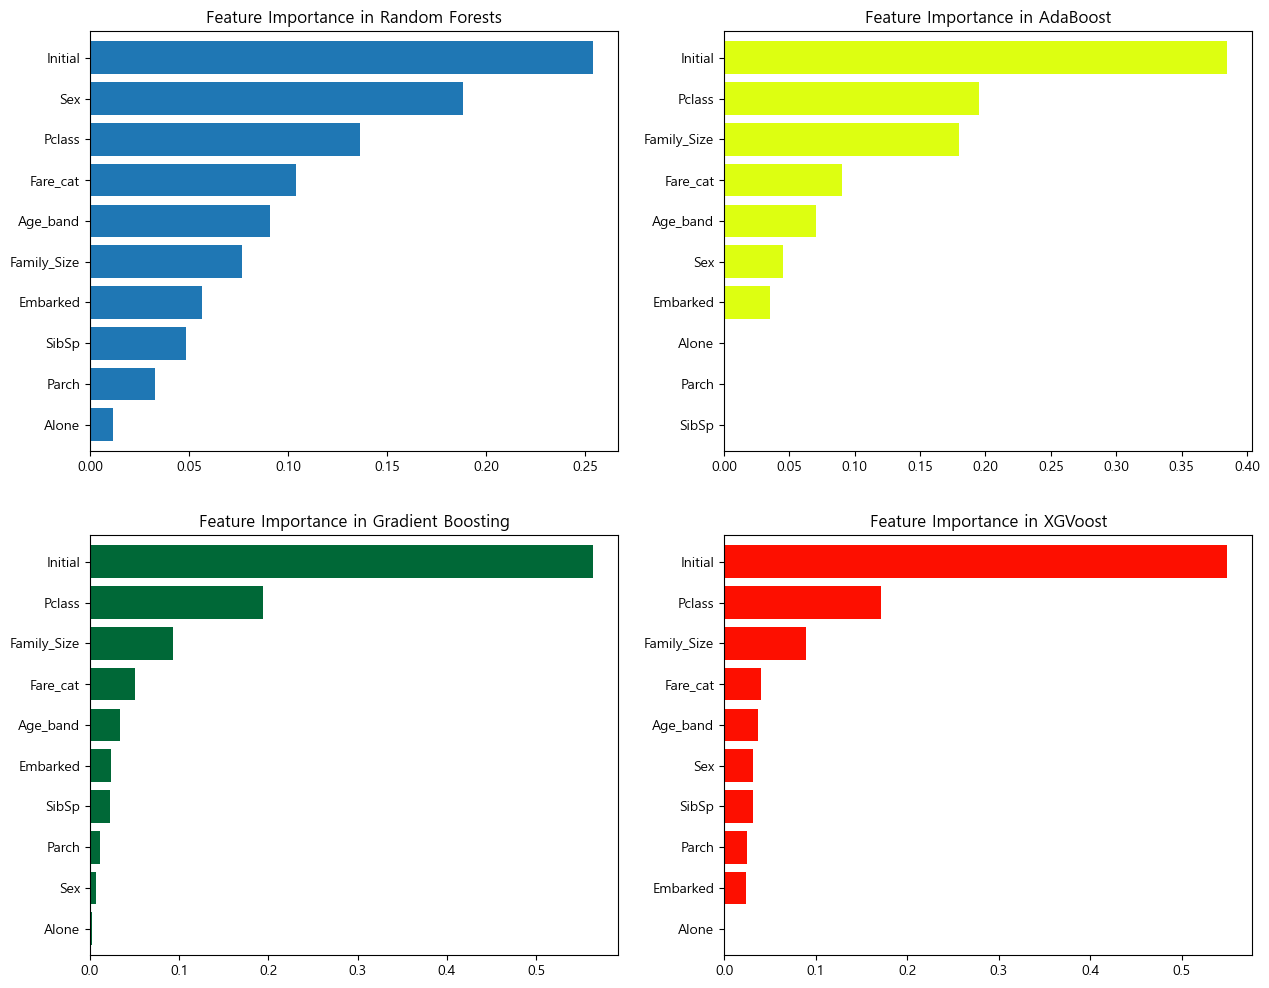

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XGVoost')

plt.show();

## conclusion

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

Observations:  
1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are: 

1) [For R: Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/code/pliptor/divide-and-conquer-0-82296?scriptVersionId=4027429)

2) [For Python: Pytanic by Heads and Tails](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

3) [For Python: Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.

## DeeL 번역
RandomForests, AdaBoost 등과 같은 다양한 분류기의 중요한 기능을 확인할 수 있습니다.

관찰:  
1)공통적으로 중요한 기능 중 일부는 Initial, Fare_cat, Pclass, Family_Size입니다.

2)성별(Sex) 기능은 중요하지 않은 것으로 보이는데, 앞서 성별과 Pclass의 조합이 매우 좋은 차별화 요소를 제공한다는 것을 보았기 때문에 충격적입니다. 섹스는 랜덤포레스트에서만 중요한 것으로 보입니다.

그러나 많은 분류기에서 최상위에 있는 Initial이라는 특징을 볼 수 있는데, 이미 Sex와 Initial은 양의 상관관계를 보았기 때문에 둘 다 성별을 의미한다고 볼 수 있습니다.  

3)마찬가지로 Pclass와 Fare_cat은 승객의 상태를, Family_Size는 Alone, Parch, SibSp와 함께 승객의 상태를 나타냅니다.

여러분 모두 머신 러닝에 대한 인사이트를 얻으셨기를 바랍니다. 머신러닝을 위한 다른 훌륭한 노트북은 다음과 같습니다: 
1) [R용: 나누고 정복하기(Oscar Takeshita 저)](https://www.kaggle.com/code/pliptor/divide-and-conquer-0-82296?scriptVersionId=4027429)

2) [Python용: 머리와 꼬리의 파이타닉(Pytanic)](https://www.kaggle.com/code/headsortails/pytanic/notebook)

3) [Python용: 이방성을 이용한 앙상블/스태킹 소개](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook)

이 노트북을 살펴봐 주셔서 감사합니다. 이 노트북이 유용했다면 업보트를 해 주세요.

https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling/notebook

https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook